In [225]:
import pandas as pd
import geopandas as gp
import os
import numpy as np
import glob
#Set options for pandas displays
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 5000
pd.options.display.max_seq_items = 5000

# Arkansas 2020

## VEST Documentation:

Election results from Arkansas Secretary of State (https://www.sos.arkansas.gov/elections/research/election-results)  
  
Precinct shapefile from the Arkansas GIS Office (http://gis.arkansas.gov/product/election-precincts/)  
  
Greene County was consolidated from 24 townships to 6 townships by court order in late 2019. Due to the proximity of the 2020 elections the results were reported by ballot type rather than by precincts based on the prior township map. The associated precinct parts were identified using the voter statistics report provided by the county. The relevant splits involve the state house districts, a Justice of the Peace district, and two school districts. Note also that in the general election results from the AR Secretary of State one of the reporting units in the new Bagwell Lake township is mislabeled as Crowley Ridge 3.  
  
Precinct merges were made in the following counties to match county reporting units: Carroll, Crittenden, Dallas, Hot Spring, Howard, Independence, Mississippi, Monroe, Nevada, Phillips, Poinsett, St. Francis.  
  
The following additional revisions were made to match the 2020 precinct boundaries.  
  
Boone: Add precinct splits with municipal and district boundaries on county map  
Greene: Align Paragould city wards with city PDF  
Izard: Split Sage in Melbourne 4 and Oxford in Brockwell with township shapefile  
Nevada: Split West Rural by township  
Ouachita: Split 11/19 with township and state house district shapefiles  
Phillips: Add Helena-West Helena wards from city redistricting map  
Prairie: Split White River Country with school zone shapefile  
Sebastian: Split 9-2A and 9-2C by Greenwood city ward  
St. Francis: Align Forrest City wards with city PDF and municipal code  
  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  
G20PREACAR - Brian Carroll (American Solidarity Party)  
G20PREOMYE - John Richard Myers (Life and Liberty Party)  
G20PRESLAR - Gloria La Riva (Socialism and Liberation Party)  
G20PREIWES - Kanye West (Independent)  
G20PREICOL - Phil Collins (Independent)  
G20PREIPIE - Brock Pierce (Independent)  
G20PREIGAM - C.L. Gammon (Independent)  
G20PREIFUE - Roque "Rocky" De La Fuente (Independent)  
  
G20USSRCOT - Tom Cotton (Republican Party)  
G20USSDHAR - Ricky Dale Harrington Jr. (Libertarian Party)  

## Load VEST's Final File

In [226]:
vest_shp = gp.read_file("./raw-from-source/VEST/ar_2020/ar_2020.shp")

In [227]:
vest_shp.shape

(2591, 20)

In [228]:
vest_shp.head(1)

,STATE_FIPS,COUNTY_FIP,COUNTY_NAM,PRECINCT,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREACAR,G20PREOMYE,G20PRESLAR,G20PREIWES,G20PREICOL,G20PREIPIE,G20PREIGAM,G20PREIFUE,G20USSRCOT,G20USSDHAR,geometry
0,05,037,Cross,Bedford,181,33,2,0,1,0,0,0,0,1,1,0,0,177,39,"POLYGON ((697681.635 3899596.428, 697449.054 3..."


<AxesSubplot:>

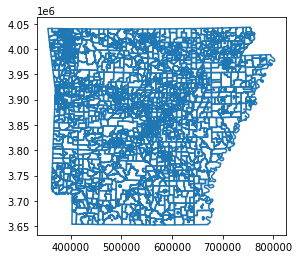

In [229]:
vest_shp.boundary.plot()

### Load Election Data

Because the Arkansas Secretary of State data the precinct level is only available by county (instead of statewide), we used election data from Open Elections (https://github.com/openelections/openelections-data-ar/tree/master/2018). 

In [230]:
#Read in Sorted precinct files for counties listed by VEST
path = "./raw-from-source/OpenElections/counties"
  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
ar_2020_counties = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    ar_2020_counties = pd.read_csv(filename)
    content.append(ar_2020_counties)
    
# converting content to data frame
df_2020_cnty = pd.concat(content)
print(df_2020_cnty.shape)

(76556, 7)


#### Take a look at the dataframe

In [231]:
df_2020_cnty.head(1)

,county,precinct,office,district,party,candidate,votes
0,Arkansas,MCFALL,U.S. President,Vice President,Lib,Jo Jorgensen/Jeremy 'Spike' Cohen,0


In [232]:
df_2020_cnty['precinct'] = df_2020_cnty['precinct'].astype(str)

In [233]:
df_2020_cnty[df_2020_cnty['county']=="Jefferson"].head(10)

,county,precinct,office,district,party,candidate,votes
0,Jefferson,1,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
1,Jefferson,2,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,1
2,Jefferson,3,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
3,Jefferson,4,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
4,Jefferson,5,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
5,Jefferson,7,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
6,Jefferson,8,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
7,Jefferson,9,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
8,Jefferson,10,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0
9,Jefferson,11,U.S. President,Vice President,IND,C.L. Gammon/Phil Collins,0


In [234]:
offices=['U.S. President','U.S. Senate']
df_2020_cnty=df_2020_cnty[df_2020_cnty['office'].isin(offices)]
df_2020_cnty.head(1)
election_results=df_2020_cnty

In [235]:
election_results['candidate'].unique()

array(["Jo Jorgensen/Jeremy 'Spike' Cohen", 'Kanye West/Michelle Tidball',
       'Howie Hawkins/Angela Walker', 'Don Blankenship/William Mohr',
       'John Richard Myers/Tiara Suzanne Lusk',
       'Donald J. Trump/Michael R. Pence', 'Brock Pierce/Karla Ballard',
       'Joseph R. Biden/Kamala Harris', 'Brian Carroll/Amar Patel',
       'Phil Collins/Billy Joe Parker', 'C.L. Gammon/Phil Collins',
       "Roque 'Rocky' De La Fuente/Darcy G. Richardson",
       'Gloria La Riva/Sunil Freeman', 'Ricky Dale Harrington Jr.',
       'Senator Tom Cotton'], dtype=object)

In [236]:
#Load the nationwide FIPS file and filter by New Jersey
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Arkansas"]

#Make the FIPS three digits
fips_file["FIPS County"] = fips_file["FIPS County"].astype(str)
fips_file["FIPS County"] = fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file['County Name'], fips_file['FIPS County']))
fips_dict["Montgomery"] = '097'
fips_dict

{'Arkansas': '001',
 'Ashley': '003',
 'Baxter': '005',
 'Benton': '007',
 'Boone': '009',
 'Bradley': '011',
 'Calhoun': '013',
 'Carroll': '015',
 'Chicot': '017',
 'Clark': '019',
 'Clay': '021',
 'Cleburne': '023',
 'Cleveland': '025',
 'Columbia': '027',
 'Conway': '029',
 'Craighead': '031',
 'Crawford': '033',
 'Crittenden': '035',
 'Cross': '037',
 'Dallas': '039',
 'Desha': '041',
 'Drew': '043',
 'Faulkner': '045',
 'Franklin': '047',
 'Fulton': '049',
 'Garland': '051',
 'Grant': '053',
 'Greene': '055',
 'Hempstead': '057',
 'Hot Spring': '059',
 'Howard': '061',
 'Independence': '063',
 'Izard': '065',
 'Jackson': '067',
 'Jefferson': '069',
 'Johnson': '071',
 'Lafayette': '073',
 'Lawrence': '075',
 'Lee': '077',
 'Lincoln': '079',
 'Little River': '081',
 'Logan': '083',
 'Lonoke': '085',
 'Madison': '087',
 'Marion': '089',
 'Miller': '091',
 'Mississippi': '093',
 'Monroe': '095',
 'Nevada': '099',
 'Newton': '101',
 'Ouachita': '103',
 'Perry': '105',
 'Phillips': '1

In [237]:
#Add FIPS columns
election_results["COUNTY_FIP"]=election_results["county"].map(fips_dict).fillna(election_results["county"])

In [238]:
#Clean up precinct column by stripping the white space
election_results["precinct"]=election_results["precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTY_FIP"]+election_results["precinct"]

In [239]:
#Run the pivot
pivoted_results = pd.pivot_table(election_results,values=["votes"],index=["pivot_col"],columns=["candidate"],aggfunc=sum)

#Fill in N/A with 0
pivoted_results = pivoted_results.fillna(0)

#Clean the columns
pivoted_results.reset_index(drop=False,inplace=True)
pivoted_results.columns = pivoted_results.columns.droplevel(0)

In [240]:
#Print to get an idea of the pivoted df
pivoted_results.head(1)

candidate,,Brian Carroll/Amar Patel,Brock Pierce/Karla Ballard,C.L. Gammon/Phil Collins,Don Blankenship/William Mohr,Donald J. Trump/Michael R. Pence,Gloria La Riva/Sunil Freeman,Howie Hawkins/Angela Walker,Jo Jorgensen/Jeremy 'Spike' Cohen,John Richard Myers/Tiara Suzanne Lusk,Joseph R. Biden/Kamala Harris,Kanye West/Michelle Tidball,Phil Collins/Billy Joe Parker,Ricky Dale Harrington Jr.,Roque 'Rocky' De La Fuente/Darcy G. Richardson,Senator Tom Cotton
0,001ALMYRA,0,0,0,0,96,1,0,2,0,10,0,0,12,0,96


In [241]:
pivoted_results.rename(columns={ pivoted_results.columns[0]: "join_col" }, inplace = True)
pivoted_results.columns = pivoted_results.columns.get_level_values(0)

In [242]:
#Add FIPS State and County columns
pivoted_results.insert(loc=0, column='STATE_FIP', value='5')
pivoted_results.insert(loc=1, column='COUNTY_FIP', value=pivoted_results['join_col'].str[0:3])
pivoted_results.insert(loc=3, column='PRECINCT', value=pivoted_results['join_col'].str[3:])

In [243]:
pivoted_results.head(1)

candidate,STATE_FIP,COUNTY_FIP,join_col,PRECINCT,Brian Carroll/Amar Patel,Brock Pierce/Karla Ballard,C.L. Gammon/Phil Collins,Don Blankenship/William Mohr,Donald J. Trump/Michael R. Pence,Gloria La Riva/Sunil Freeman,Howie Hawkins/Angela Walker,Jo Jorgensen/Jeremy 'Spike' Cohen,John Richard Myers/Tiara Suzanne Lusk,Joseph R. Biden/Kamala Harris,Kanye West/Michelle Tidball,Phil Collins/Billy Joe Parker,Ricky Dale Harrington Jr.,Roque 'Rocky' De La Fuente/Darcy G. Richardson,Senator Tom Cotton
0,5,001,001ALMYRA,ALMYRA,0,0,0,0,96,1,0,2,0,10,0,0,12,0,96


In [244]:
#Rename Columns
pivoted_results.columns = ['STATE_FIP', 'COUNTY_FIP', 'join_col', 'PRECINCT', 'G20PREACAR','G20PREIPIE','G20PREIGAM','G20PRECBLA','G20PRERTRU','G20PRESLAR','G20PREGHAW','G20PRELJOR','G20PREOMYE','G20PREDBID','G20PREIWES','G20PREICOL','G20USSDHAR','G20PREIFUE','G20USSRCOT']

In [245]:
pivoted_results.head(1)

,STATE_FIP,COUNTY_FIP,join_col,PRECINCT,G20PREACAR,G20PREIPIE,G20PREIGAM,G20PRECBLA,G20PRERTRU,G20PRESLAR,G20PREGHAW,G20PRELJOR,G20PREOMYE,G20PREDBID,G20PREIWES,G20PREICOL,G20USSDHAR,G20PREIFUE,G20USSRCOT
0,5,001,001ALMYRA,ALMYRA,0,0,0,0,96,1,0,2,0,10,0,0,12,0,96


In [246]:
election_results=pivoted_results

## Compare Election Result Totals

### Compare Vote Totals

In [247]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20PREACAR',
 'G20PREOMYE',
 'G20PRESLAR',
 'G20PREIWES',
 'G20PREICOL',
 'G20PREIPIE',
 'G20PREIGAM',
 'G20PREIFUE',
 'G20USSRCOT',
 'G20USSDHAR']

In [248]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

2412330
2412330


### Compare Race Totals

In [249]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [250]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU is equal 	VEST / RDH: 760647
G20PREDBID is equal 	VEST / RDH: 423932
G20PRELJOR is equal 	VEST / RDH: 13133
G20PREGHAW is equal 	VEST / RDH: 2980
G20PRECBLA is equal 	VEST / RDH: 2108
G20PREACAR is equal 	VEST / RDH: 1713
G20PREOMYE is equal 	VEST / RDH: 1372
G20PRESLAR is equal 	VEST / RDH: 1336
G20PREIWES is equal 	VEST / RDH: 4099
G20PREICOL is equal 	VEST / RDH: 2812
G20PREIPIE is equal 	VEST / RDH: 2141
G20PREIGAM is equal 	VEST / RDH: 1475
G20PREIFUE is equal 	VEST / RDH: 1321
G20USSRCOT is equal 	VEST / RDH: 793871
G20USSDHAR is equal 	VEST / RDH: 399390


### Compare County Totals

In [251]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [252]:
county_totals_check(vest_shp,election_results,races,'COUNTY_FIP')

***Countywide Totals Check***

G20PRERTRU is equal across all counties
G20PREDBID is equal across all counties
G20PRELJOR is equal across all counties
G20PREGHAW is equal across all counties
G20PRECBLA is equal across all counties
G20PREACAR is equal across all counties
G20PREOMYE is equal across all counties
G20PRESLAR is equal across all counties
G20PREIWES is equal across all counties
G20PREICOL is equal across all counties
G20PREIPIE is equal across all counties
G20PREIGAM is equal across all counties
G20PREIFUE is equal across all counties
G20USSRCOT is equal across all counties
G20USSDHAR is equal across all counties
[]


## Prepare Join

In [253]:
vest_shp['join_col']=vest_shp['COUNTY_FIP']+vest_shp['PRECINCT']

In [254]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

2575
2575
2591
2591


In [255]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [256]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PRECINCT"])
print(len(empty_precincts))

35


In [257]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PRECINCT"])
print(len(empty_precincts))

15


## Attempt Join

In [258]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

right_only    1739
left_only     1723
both           852
Name: _merge, dtype: int64


In [259]:
join_attempt_one['join_col'] = join_attempt_one['join_col'].astype('str')
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTY_FIP_x','PRECINCT_x','COUNTY_FIP_y','PRECINCT_y','join_col']].head(10)

,COUNTY_FIP_x,PRECINCT_x,COUNTY_FIP_y,PRECINCT_y,join_col
0,001,ALMYRA,NaN,NaN,001ALMYRA
1,001,ARKANSAS,NaN,NaN,001ARKANSAS
2,001,BARTON,NaN,NaN,001BARTON
3,001,BAYOU METO,NaN,NaN,001BAYOU METO
4,001,BREWER,NaN,NaN,001BREWER
5,001,CHESTER,NaN,NaN,001CHESTER
6,001,CROCKETT,NaN,NaN,001CROCKETT
7,001,DEWITT WARD 1,NaN,NaN,001DEWITT WARD 1
8,001,DEWITT WARD 2,NaN,NaN,001DEWITT WARD 2
9,001,DEWITT WARD 3,NaN,NaN,001DEWITT WARD 3


In [260]:
ar_names_dict = {'001ALMYRA': '00115 - ALMYRA',
 '001ARKANSAS': '00132 - ARKANSAS',
 '001BARTON': '00143 - BARTON',
 '001BAYOU METO': '00138 - BAYOU METO',
 '001BREWER': '00145 - BREWER',
 '001CHESTER': '00131 - CHESTER',
 '001CROCKETT': '00112 - CROCKETT',
 '001DEWITT WARD 1': '00151 - DEWITT 1',
 '001DEWITT WARD 2': '00153 - DEWITT 2',
 '001DEWITT WARD 3': '00155 - DEWITT 3',
 '001GARLAND': '00146 - GARLAND',
 '001GILLETT WARD 1': '00134 - GILLETT WARD 1',
 '001GILLETT WARD 2': '00135 - GILLETT WARD 2',
 '001GILLETT WARD 3': '00136 - GILLETT WARD 3',
 '001GUM POND': '00142 - GUM POND',
 '001HENTON': '00144 - HENTON',
 '001HUMPHREY WARD 1': '00147 - HUMPHREY WARD 1',
 '001HUMPHREY WARD 3': '00148 - HUMPHREY WARD 3',
 '001KEATON': '00113 - KEATON',
 '001LAGRUE': '00122 - LAGRUE',
 '001MCFALL': '00111 - MCFALL',
 '001MILL BAYOU': '00114 - MILL BAYOU',
 '001MORRIS': '00141 - MORRIS',
 '001PRAIRIE': '00121 - PRAIRIE',
 '001PT DELUCE': '00137 - PT DELUCE',
 '001ST. CHARLES': '00123 - ST. CHARLES',
 '001STANLEY': '00133 - STANLEY',
 '001STUTTGART WARD 1': '00171 - STUTTGART 1',
 '001STUTTGART WARD 2': '00181 - STUTTGART 2',
 '001STUTTGART WARD 3': '00191 - STUTTGART 3',
 '003BEECH CREEK': '00317 - BEECH CREEK',
 '003BOYDELL': '00323 - BOYDELL',
 '003COOTER': '00308 - COOTER',
 '003CROSSROADS': '00310 - CROSSROADS',
 '003CW1': '00301 - CROSSETT WARD 1',
 '003CW2': '00302 - CROSSETT WARD 2',
 '003CW3': '00303 - CROSSETT WARD 3',
 '003FH CITY': '00319 - FOUNTAIN HILL CITY',
 '003FH RURAL': '00320 - FOUNTAIN HILL RURAL',
 '003HBG RURAL': '00314 - HAMBURG RURAL',
 '003HICKORY GROVE': '00309 - HICKORY GROVE',
 '003HW1': '00313 - HAMBURG WARD 1',
 '003HW2': '00312 - HAMBURG WARD 2',
 '003HW3': '00311 - HAMBURG WARD 3',
 '003MILO': '00316 - MILO',
 '003MIST': '00318 - MIST',
 '003MONTROSE CITY': '00325 - MONTROSE CITY',
 '003MONTROSE RURAL': '00326 - MONTROSE RURAL',
 '003MT ZION': '00315 - MT. ZION',
 '003NCE': '00304 - NORTH CROSSETT EAST',
 '003NCW': '00305 - NORTH CROSSETT WEST',
 '003PARKDALE CITY': '00327 - PARKDALE CITY',
 '003PARKDALE RURAL': '00328 - PARKDALE RURAL',
 '003PORTLAND CITY': '00321 - PORTLAND CITY',
 '003PORTLAND RURAL': '00322 - PORTLAND RURAL',
 '003SNY/TRA': '00324 - SNYDER / TRAFALGAR',
 '003VOTECH': '00307 - VO - TECH',
 '003WCR': '00306 - WEST CROSSETT RURAL',
 '003WILMOT CITY': '00329 - WILMOT CITY',
 '003WILMOT RURAL': '00330 - WILMOT RURAL',
 '0051-1': '00501-1',
 '0051-2': '00501-2',
 '0051-3': '00501-3',
 '0052-1': '00502-1',
 '0052-2': '00502-2',
 '0052-3': '00502-3',
 '0053-1': '00503-1',
 '0053-2': '00503-2',
 '0053-3': '00503-3',
 '0053-4': '00503-4',
 '0054-1': '00504-1',
 '0054-2': '00504-2',
 '0055-1': '00505-1',
 '0055-2': '00505-2',
 '0055-3': '00505-3',
 '0055-4': '00505-4',
 '0056-1': '00506-1',
 '0056-2': '00506-2',
 '0056-3': '00506-3',
 '0057-1': '00507-1',
 '0057-2': '00507-2',
 '0057-3': '00507-3',
 '0058-1': '00508-1',
 '0058-2': '00508-2',
 '0058-3': '00508-3',
 '0058-4': '00508-4',
 '0058-5': '00508-5',
 '0059-1': '00509-1',
 '0059-2': '00509-2',
 '0059-3': '00509-3',
 '0059-4': '00509-4',
 '007PRECINCT 1': '007PRECINCT 01',
 '007PRECINCT 2': '007PRECINCT 02',
 '007PRECINCT 3': '007PRECINCT 03',
 '007PRECINCT 4': '007PRECINCT 04',
 '007PRECINCT 5': '007PRECINCT 05',
 '007PRECINCT 6': '007PRECINCT 06',
 '007PRECINCT 7': '007PRECINCT 07',
 '007PRECINCT 8': '007PRECINCT 08',
 '007PRECINCT 9': '007PRECINCT 09',
 '009DISTRICT 10.1,10.2,10.7': '009DISTRICT 10.1/10.2/10.7',
 '009DISTRICT 10.3,10.4,10.6': '009DISTRICT 10.3/10.4/10.6',
 '009DISTRICT 11.1,11.2,11.3,11.4': '009DISTRICT 11.1-11.4',
 '009DISTRICT 12.1,12.2,12.3': '009DISTRICT 12.1/12.2/12.3',
 '009DISTRICT 3.1,3.3': '009DISTRICT 3.1/3.3',
 '009DISTRICT 5.1,5.2,5.3,5.9': '009DISTRICT 5.1/5.2/5.3/5.9',
 '009DISTRICT 5.5,5.7,5.8': '009DISTRICT 5.5/5.7/5.8',
 '009DISTRICT 6.2,6.5,6.8': '009DISTRICT 6.2/6.5/6.8',
 '009DISTRICT 6.3,6.4': '009DISTRICT 6.3/6.4',
 '009DISTRICT 6.6,6.7': '009DISTRICT 6.6/6.7',
 '009DISTRICT 7.2,7.3,7.8': '009DISTRICT 7.2/7.3/7.8',
 '009DISTRICT 7.4,7.5,7.6,7.7': '009DISTRICT 7.4-7.7',
 '009DISTRICT 8.1,8.5': '009DISTRICT 8.1/8.5',
 '009DISTRICT 8.2,8.3,8.4': '009DISTRICT 8.2/8.3/8.4',
 '009DISTRICT 9.1,9.2,9.3,9.6': '009DISTRICT 9.1/9.2/9.3/9.6',
 '011BANKS CITY': '01106 - BANKS CITY',
 '011BANKS RURAL': '01107 - BANKS RURAL',
 '011EAGLE LAKE': '01111 - EAGLE LAKE',
 '011HERMITAGE CITY': '01109 - HERMITAGE CITY',
 '011HERMITAGE RURAL': '01110 - HERMITAGE RURAL',
 '011JERSEY': '01112 - JERSEY',
 '011JOHNSVILLE': '01113 - JOHNSVILLE',
 '011MARION': '01114 - MARION',
 '011NORTH': '01104 - NORTH',
 '011SOUTH': '01105 - SOUTH',
 '011SPRINGHILL': '01108 - SPRINGHILL',
 '011WARD 1': '01101 - WARREN WARD 1',
 '011WARD 2': '01102 - WARREN WARD 2',
 '011WARD 3': '01103 - WARREN WARD 3',
 '013WATSON ADDITION': '013TINSMAN WATSON',
 '015BEAVER/PACKARD/WINONA': '015BEAVER/PACKARD SPRINGS/WINONA',
 '015BV WARDS 1 AND 2': '015BERRYVILLE',
 '015DRYFORK/OMEGA/OSAGE/PINEY': '015DRY FORK/OMEGA/OSAGE/PINEY',
 '015ES WARDS 1, 2, 3': '015EUREKA SPRINGS',
 '015GF WARDS 1 AND 2': '015GREEN FOREST',
 '015HICKORIES': '015HICKORY',
 '015NORTH/SOUTH YOCUM': '015YOCUM NORTH/SOUTH',
 '015PRAIRIES/CABANAL': '015PRAIRIE/CABANAL',
 '017BOWIE 1': '017301 - BOWIE 1',
 '017BOWIE 2': '017302 - BOWIE 2',
 '017BOWIE 3': '017303 - BOWIE 3',
 '017BOWIE RURAL': '017304 - BOWIE RURAL',
 '017CARLTON 1': '017101 - CARLTON 1',
 '017CARLTON 2': '017102 - CARLTON 2',
 '017CARLTON 3': '017103 - CARLTON 3',
 '017CARLTON RURAL': '017104 - CARLTON RURAL',
 '017PLANTERS 1': '017201 - PLANTERS 1',
 '017PLANTERS 2': '017202 - PLANTERS 2',
 '017PLANTERS 3': '017203 - PLANTERS 3',
 '017PLANTERS 4': '017204 - PLANTERS 4',
 '017PLANTERS RURAL': '017205 - PLANTERS RURAL',
 '019CENTRAL': '019CENTRAL 1',
 '019CURTIS': '019CURTIS 1',
 '019EAST COUNTY': '019EAST COUNTY 1',
 '019GUM SPRINGS INSIDE': '019GUM SPRINGS 1',
 '019GUM SPRINGS OUTSIDE': '019GUM SPRINGS OUTSIDE 1',
 '019GURDON GENERAL': '019GURDON GEN 1',
 '019HOLLYWOOD': '019HOLLYWOOD 1',
 '019OKOLONA': '019OKOLONA CITY 1',
 '019SOUTH COUNTY': '019SOUTH COUNTY 1',
 '019WEST COUNTY': '019WEST COUNTY 1',
 '019WHELEN SPRINGS': '019WHELEN SPRINGS 1',
 '021BENNETT AND LEMMONS': '02105 - BENNETT & LEMMONS',
 '021BRADSHAW & HAYWOOD': '02106 - BRADSHAW & HAYWOOD',
 '021BROWN & CARPENTER': '02112 - BROWN & CARPENTER',
 '021CACHE & WILSON': '02113 - CACHE & WILSON',
 '021CLARK': '02114 - CLARK',
 '021EAST OAK BLUFF': '02103 - E OAK BLUFF & BLUE CANE',
 '021JOHNSON': '02107 - JOHNSON',
 '021KNOB': '02108 - KNOB',
 '021LIDDELL & CHALK BLUFF': '02109 - LIDDELL & CHALK BLUFF',
 '021N KILGORE & CLEVELAND': '02116 - CLEVELAND & N KILGORE',
 '021NELSON': '02115 - NELSON',
 '021NORTH ST. FRANCIS': '02101 - NORTH ST FRANCIS',
 '021PAYNE & SWAIN': '02110 - PAYNE & SWAIN',
 '021POLLARD': '02111 - POLLARD',
 '021S KILGORE & GLEGHORN': '02117 - GLEGHORN & S KILGORE',
 '021SOUTH ST. FRANCIS': '02102 - SOUTH ST FRANCIS',
 '021WEST OAK BLUFF': '02104 - WEST OAK BLUFF',
 '023CALIFORNIA-006': '02306 - CALIFORNIA',
 '023CENTER POST-007': '02307 - CENTER POST',
 '023CLAYTON-008': '02308 - CLAYTON',
 '023EAST PETER CREEK-023': '02323 - EAST PETER CREEK',
 '023FRANCIS-009': '02309 - FRANCIS',
 '023GILES-013': '02313 - GILES',
 '023GRASSEY INSIDE-010': '02310 - GRASSEY INSIDE',
 '023GRASSEY OUTSIDE-011': '02311 - GRASSEY OUTSIDE',
 '023GREERS FERRY GILES-012': '02312 - GREERS FERRY GILES',
 '023HEALING SPRINGS-014': '02314 - HEALING SPRINGS',
 '023HEBER SPRINGS OUTSIDE-019': '02319 - HEBER SPRINGS OUTSIDE',
 '023HEBER SPRINGS WARD 1-015': '02315 - HEBER SPRINGS WARD 1',
 '023HEBER SPRINGS WARD 2-016': '02316 - HEBER SPRINGS WARD 2',
 '023HEBER SPRINGS WARD 3-017': '02317 - HEBER SPRINGS WARD 3',
 '023HEBER SPRINGS WARD 4-018': '02318 - HEBER SPRINGS WARD 4',
 '023MCJESTER-020': '02320 - MCJESTER',
 '023MORGAN INSIDE-035': '02335 - MORGAN INSIDE',
 '023MORGAN OUTSIDE-021': '02321 - MORGAN OUTSIDE',
 '023MOUNTAIN-022': '02322 - MOUNTAIN',
 '023NORTH CADRON INSIDE-002': '02302 - NORTH CADRON INSIDE',
 '023NORTH CADRON OUTSIDE-003': '02303 - NORTH CADRON OUTSIDE',
 '023PICKENS-025': '02325 - PICKENS',
 '023PINE-026': '02326 - PINE',
 '023PINEY-027': '02327 - PINEY',
 '023POFF-028': '02328 - POFF',
 '023SALINE INSIDE-029': '02329 - SALINE INSIDE',
 '023SALINE OUTSIDE-030': '02330 - SALINE OUTSIDE',
 '023SOUTH CADRON INSIDE-004': '02304 - SOUTH CADRON INSIDE',
 '023SOUTH CADRON OUTSIDE-005': '02305 - SOUTH CADRON OUTSIDE',
 '023SUGAR CAMP-031': '02331 - SUGAR CAMP',
 '023SUGAR LOAF-032': '02332 - SUGAR LOAF',
 '023VALLEY-033': '02333 - VALLEY',
 '023WEST PETER CREEK-024': '02324 - WEST PETER CREEK',
 '023WILBURN-034': '02334 - WILBURN',
 '025BOWMAN': '02503 - BOWMAN',
 '025HARPER': '02504 - HARPER',
 '025HUDGIN': '02505 - HUDGIN',
 '025HURRICANE': '02506 - HURRICANE',
 '025KINGSLAND INSIDE': '02502A - KINGSLAND INSIDE',
 '025KINGSLAND OUTSIDE': '02502B - KINGSLAND OUTSIDE',
 '025LEE': '02507 - LEE',
 '025MILLER': '02508 - MILLER',
 '025NIVEN': '02509 - NIVEN',
 '025REDLAND': '02510 - REDLAND',
 '025RISON INSIDE': '02501A - RISON INSIDE',
 '025RISON OUTSIDE': '02501B - RISON OUTSIDE',
 '025ROWELL': '02511 - ROWELL',
 '025SALINE': '02512 - SALINE',
 '025SMITH': '02514 - SMITH',
 '025WHITEOAK': '02515 - WHITEOAK',
 '025WHITEVILLE': '02516 - WHITEVILLE',
 '029AUSTIN': '029001 - AUSTIN',
 '029BENTLEY CITY': '029002 - BENTLEY CITY',
 '029BENTLEY RURAL': '029022 - BENTLEY RURAL',
 '029BIRD': '029024 - BIRD',
 '029CATHOLIC POINT': '029025 - CATHOLIC POINT',
 '029CEDAR FALLS': '029009 - CEDAR FALLS',
 '029GREGORY': '029010 - GREGORY',
 '029GRIFFIN': '029011 - GRIFFIN',
 '029HIGGINS': '029008 - HIGGINS',
 '029HOWARD CITY': '029007 - HOWARD CITY',
 '029HOWARD RURAL': '029015 - HOWARD RURAL',
 '029LICK MTN.': '029012 - LICK MOUNTAIN',
 '029MARTIN': '029019 - MARTIN',
 '029MCCLAREN': '029014 - MCCLAREN',
 '029MENIFEE CITY': '029006 - MENIFEE CITY',
 '029MENIFEE RURAL': '029031 - MENIFEE RURAL',
 '029NICHOLS': '029027 - NICHOLS',
 '029OLD HICKORY': '029028 - OLD HICKORY',
 '029PETIT JEAN': '029026 - PETIT JEAN',
 '029ST. VINCENT': '029004 - ST VINCENT',
 '029STEELE': '029005 - STEELE',
 '029UNION': '029021 - UNION',
 '029WARD 1': '029029 - MORRILTON WARD 1',
 '029WARD 2': '029020 - MORRILTON WARD 2',
 '029WARD 3': '029017 - MORRILTON WARD 3',
 '029WARD 4': '029018 - MORRILTON WARD 4',
 '029WASHINGTON EAST': '029013 - WASHINGTON EAST',
 '029WASHINGTON WEST': '029023 - WASHINGTON WEST',
 '029WELBOURNE EAST': '029030 - WELBOURNE EAST',
 '029WELBOURNE WEST': '029003 - WELBOURNE WEST',
 '029WHITE EAGLE': '029016 - WHITE EAGLE',
 '031PRECINCT 1': '03101',
 '031PRECINCT 10': '03110',
 '031PRECINCT 11': '03111',
 '031PRECINCT 12': '03112',
 '031PRECINCT 13': '03113',
 '031PRECINCT 14': '03114',
 '031PRECINCT 15': '03115',
 '031PRECINCT 16': '03116',
 '031PRECINCT 17': '03117',
 '031PRECINCT 18': '03118',
 '031PRECINCT 19': '03119',
 '031PRECINCT 2': '03102',
 '031PRECINCT 20': '03120',
 '031PRECINCT 21': '03121',
 '031PRECINCT 22': '03122',
 '031PRECINCT 23': '03123',
 '031PRECINCT 24': '03124',
 '031PRECINCT 25': '03125',
 '031PRECINCT 26': '03126',
 '031PRECINCT 27': '03127',
 '031PRECINCT 28': '03128',
 '031PRECINCT 29': '03129',
 '031PRECINCT 3': '03103',
 '031PRECINCT 30': '03130',
 '031PRECINCT 31': '03131',
 '031PRECINCT 32': '03132',
 '031PRECINCT 33': '03133',
 '031PRECINCT 34': '03134',
 '031PRECINCT 35': '03135',
 '031PRECINCT 36': '03136',
 '031PRECINCT 37': '03137',
 '031PRECINCT 38': '03138',
 '031PRECINCT 39': '03139',
 '031PRECINCT 4': '03104',
 '031PRECINCT 40': '03140',
 '031PRECINCT 41': '03141',
 '031PRECINCT 42': '03142',
 '031PRECINCT 43': '03143',
 '031PRECINCT 44': '03144',
 '031PRECINCT 45': '03145',
 '031PRECINCT 46': '03146',
 '031PRECINCT 47': '03147',
 '031PRECINCT 48': '03148',
 '031PRECINCT 49': '03149',
 '031PRECINCT 5': '03105',
 '031PRECINCT 50': '03150',
 '031PRECINCT 51': '03151',
 '031PRECINCT 52': '03152',
 '031PRECINCT 53': '03153',
 '031PRECINCT 6': '03106',
 '031PRECINCT 7': '03107',
 '031PRECINCT 8': '03108',
 '031PRECINCT 9': '03109',
 '033ALMA 1': '033ALMA 01',
 '033ALMA 2': '033ALMA 02',
 '033ALMA 3': '033ALMA 03',
 '033ALMA 4': '033ALMA 04',
 '033COVE CITY CSD': '033COVE CITY',
 '033LEE CREEK CSD': '033LEE CREEK',
 '033MULBERRY 1': '033MULBERRY 01',
 '033MULBERRY 2': '033MULBERRY 02',
 '033MULBERRY 3': '033MULBERRY 03',
 '037BAY VILLAGE, BIRDEYE': '037BAY VILLAGE / BIRDEYE',
 '037TYRONZA/TWIST': '037TYRONZA / TWIST',
 '039DISTRICT 1': '039101 - DISTRICT 1',
 '039DISTRICT 2': '039201 - DISTRICT 2',
 '039DISTRICT 3': '039301 - DISTRICT 3',
 '039DISTRICT 4': '039401 - DISTRICT 4',
 '039DISTRICT 5': '039501 - DISTRICT 5',
 '039DISTRICT 6': '039601 - DISTRICT 6',
 '039DISTRICT 7': '039701 - DISTRICT 7',
 '039DISTRICT 8': '039801 - DISTRICT 8',
 '039DISTRICT 9': '039901 - DISTRICT 9',
 '041BOWIE 1': '04101 - BOWIE W1',
 '041BOWIE 2': '04102 - BOWIE W2',
 '041BOWIE 3': '04103 - BOWIE W3',
 '041BOWIE RURAL': '04104 - BOWIE RURAL',
 '041CLAYTON MCARTHUR': '04105 - CLAYTON MCARTHUR',
 '041CLAYTON REED': '04106 - CLAYTON REED',
 '041CLAYTON TILLAR': '04107 - CLAYTON TILLAR',
 '041FRANKLIN': '04108 - FRANKLIN',
 '041HALLEY': '04109 - HALLEY',
 '041JEFFERSON': '04110 - JEFFERSON',
 '041MISSISSIPPI': '04111 - MISSISSIPPI',
 '041MITCHELLVILLE': '04112 - MITCHEVILLE',
 '041RANDOLPH 1': '04113 - RAND W1',
 '041RANDOLPH 2': '04114 - RAND W2',
 '041RANDOLPH 3': '04115 - RAND W3',
 '041RANDOLPH 4': '04116 - RAND W4',
 '041RANDOLPH RURAL': '04117 - RAND RURAL',
 '041REDFORK': '04118 - REDFORK',
 '041RICHLAND': '04119 - RICHLAND',
 '041SILVERLAKE': '04120 - SILVER LAKE',
 '041WALNUT LAKE': '04121 - WALNUT LAKE',
 '043COLLINS': '04305 - COLLINS',
 '043ENON': '04306 - ENON',
 '043JEROME': '04307 - JEROME',
 '043LACEY': '04308 - LACEY',
 '043MARION N BOX 1': '04309 - MAR N BOX 1',
 '043MARION N BOX 2': '04310 - MAR N BOX 2',
 '043MARION SOUTH': '04311 - MARION SOUTH',
 '043OZMENT': '04312 - OZMENT',
 '043PLANTERSVILLE': '04313 - PLANTERSVILLE',
 '043SELMA': '04314 - SELMA',
 '043TILLAR': '04315 - TILLAR',
 '043WARD 1': '04301 - WARD 1',
 '043WARD 2': '04302 - WARD 2',
 '043WARD 3': '04303 - WARD 3',
 '043WARD 4': '04304 - WARD 4',
 '043WILMAR': '04316 - WILMAR',
 '043WINCHESTER': '04317 - WINCHESTER',
 '04501.01 4A': '0454A CONWAY CITY 01',
 '04502 4B': '0454B CONWAY CITY 02',
 '04503.01 4E': '0454E CONWAY CITY 03',
 '04504.01 4D': '0454D CONWAY CITY 04',
 '04505 4F': '0454F CONWAY CITY 05',
 '04506.01 2B': '0452B CONWAY CITY 06',
 '04507 2A': '0452A CONWAY CITY 07',
 '04508 3B': '0453B CONWAY CITY 08',
 '04509 3C-E': '0453C-EAST CONWAY CITY 09',
 '04510 3A': '0453A CONWAY CITY 10',
 '04511 4C': '0454C CONWAY CITY 11',
 '04512 ECADA': '045E CADRON A 12',
 '04513 ECADB': '045E CADRON B 13',
 '04514 WCAD': '045WEST CADRON 14',
 '04515 BENEDICT': '045BENEDICT 15',
 '04516 BENTON': '045BENTON 16',
 '04517 BRISTOL': '045BRISTOL 17',
 '04518 CA': '045CALIFORNIA 18',
 '04519 CLIFTON': '045CLIFTON 19',
 '04521 VILONIA CITY': '045VILONIA CITY 21',
 '04522 CYPRESS': '045CYPRESS RURAL 22',
 '04523 DANLEY RURAL': '045DANLEY RURAL 23',
 '04524 DANLEY CITY': '045DANLEY CITY (MAYFLOWER) 24',
 '04525 EAGLE': '045EAGLE 25',
 '04526 EAST FORK': '045EAST FORK 26',
 '04527 ENOLA': '045ENOLA 27',
 '04528 HARDIN RURAL': '045HARDIN RURAL 28',
 '04529 HARDIN CITY E': '045HARDIN CITY EAST (GB) 29',
 '04530 HARVE': '045HARVE 30',
 '04531 MATTHEWS': '045MATTHEWS 31',
 '04532 MOUNTAIN': '045MOUNTAIN 32',
 '04533 MT. VERNON': '045MOUNT VERNON 33',
 '04534 NEWTON': '045NEWTON 34',
 '04535 WILSON': '045WILSON 35',
 '04536 PINE NTN.': '045PINE MT 36',
 '04537 UNION': '045UNION 37',
 '04538 WALKER': '045WALKER 38',
 '04539 PALARM': '045PALARM 39',
 '04540 2D': '0452D CONWAY CITY 40',
 '04541 1C-N': '0451C-NORTH CONWAY CITY 41',
 '04542 1C-S': '0451C-SOUTH CONWAY CITY 42',
 '04543 1E-W': '0451E-EAST CONWAY CITY 43',
 '04544 1E-W': '0451E-WEST CONWAY CITY 44',
 '04545.01 3E': '0453E CONWAY CITY 45',
 '04546 3C-W': '0453C-WEST CONWAY CITY 46',
 '04548 ECADC': '045E CADRON C 48',
 '04549 2C': '0452C CONWAY CITY 49',
 '04550.01 3D': '0453D CONWAY CITY 50',
 '04553 3F': '0453F CONWAY CITY 53',
 '04554 3G': '0453G CONWAY CITY 54',
 '04555.01 HARDIN CITY W': '045HARDIN CITY WEST (GB) 55',
 '0471-A OZARK WD 1': '0471-A (OZ WD 1)',
 '0471-C OZARK WD 2': '0471-C (OZ WD 2)',
 '0472-B OZARK RURAL': '0472-B (OZ RURAL)',
 '0472-C LONELM/CRAVENS': '0472-C (LONELM/CRAVENS)',
 '0472-D WALLACE/IVY': '0472-D (WALLACE/IVY)',
 '0472-E OZARK WD 3': '0472-E (OZ WD 3)',
 '0473-A LONELM/CRAVENS': '0473-A (LONELM/CRAVENS)',
 '0473-B FERN': '0473-B (FERN)',
 '0473-C BOSTON': '0473-C (BOSTON)',
 '0473-D JETHRO': '0473-D (JETHRO)',
 '0473-E WATALULA': '0473-E (WATALULA)',
 '0473-F MOUNTAIN': '0473-F (MOUNTAIN)',
 '0474-A PHILPOT': '0474-A (PHILPOT)',
 '0474-B WATALULA': '0474-B (WATALULA)',
 '0474-C WIEDERKEHR VILLAGE': '0474-C (WV RURAL)',
 '0474-D OZARK RURAL': '0474-D (OZ RURAL)',
 '0475-A WALLACE/IVY': '0475-A (WALLACE/IVY)',
 '0475-B OZARK RURAL': '0475-B (OZ RURAL)',
 '0475-C WEBB CITY': '0475-C (WEBB CITY)',
 '0476-A ALTUS RURAL': '0476-A (ALTUS RURAL)',
 '0476-B ALTUS CITY': '0476-B (ALTUS CITY)',
 '0476-C DENNING': '0476-C (DENNING)',
 '0476-D WIEDERKEHR VILLAGE': '0476-D (WEIDERKEHR VILLAGE)',
 '0477-A CECIL': '0477-A (CECIL)',
 '0477-B WEBB CITY': '0477-B (WEBB CITY)',
 '0477-C ETNA': '0477-C (ETNA)',
 '0477-D DONALD': '0477-D (DONALD RURAL)',
 '0478-A BRANCH CITY': '0478-A (BRANCH CITY)',
 '0478-B CHARLESTON WD 1': '0478-B (CHARLESTON WD 1)',
 '0478-C CHARLESTON RURAL': '0478-C (CHARLESTON RURAL)',
 '0478-D VESTA': '0478-D (VESTA)',
 '0478-E DONALD': '0478-E (DONALD RURAL)',
 '0478-F CECIL': '0478-F (CECIL)',
 '0478-G DONALD': '0478-G (DONALD RURAL)',
 '0479-A CHARLESTON WD 2': '0479-A (CHARLESTON WD 2)',
 '0479-B CHARLESTON WD 3': '0479-B (CHARLESTON WD 3)',
 '0479-C CHARLESTON RURAL': '0479-C (CHARLESTON RURAL)',
 '049BENTON/UNION': '049BENTON - UNION',
 '049FULTON/MT CALM': '049FULTON - MT. CALM',
 '049MS/AFTON': '049MS - AFTON',
 '049PR/SB': '049PR-SB',
 '049SOUTHFORK/WILSON': '049SOUTHFORK - WILSON',
 '049VIDETTE/BIG CREEK': '049VIDETTE - BIG CREEK',
 '051012 1C': '051012',
 '051024 2T': '051024',
 '051042 4C': '051042',
 '051051 5A': '051051',
 '051061 6K': '051061',
 '051065 6S': '051065',
 '051072 7B': '051072',
 '051073 7C': '051073',
 '051082 8C': '051082',
 '051084 8F': '051084',
 '051093 9R': '051093',
 '051103 10H': '051103',
 '051115 11J': '051115',
 '051124 12G': '051124',
 '051125 12N': '051125',
 '053CALVERT': '05301 - CALVERT',
 '053DARYSAW': '05305 - DARYSAW',
 '053DAVIS': '05302 - DAVIS',
 '053DEKALB 1': '05303 - DEKALB 1',
 '053DEKALB 2': '05304 - DEKALB 2',
 '053FENTER': '05308 - FENTER',
 '053FRANKLIN': '05309 - FRANKLIN',
 '053MADISON': '05310 - MADISON',
 '053MERRY GREEN 1': '05311 - MERRY GREEN 1',
 '053MERRY GREEN 2': '05312 - MERRY GREEN 2',
 '053RIVER': '05313 - RIVER',
 '053SIMPSON 1': '05314 - SIMPSON 1',
 '053SIMPSON 2': '05315 - SIMPSON 2',
 '053TENNESSEE': '05317 - TENNESSEE',
 '053WARD 1': '05320 - WARD 1',
 '053WARD 2': '05321 - WARD 2',
 '053WARD 3': '05322 - WARD 3',
 '053WASHINGTON': '05319 - WASHINGTON',
 '055BAGWELL LAKE-1': '055BAGWELL LAKE 1',
 '055BAGWELL LAKE-2': '055BAGWELL LAKE 2',
 '055BAGWELL LAKE-3': '055BAGWELL LAKE 3',
 '055BAGWELL LAKE-4': '055BAGWELL LAKE 4',
 '055BAGWELL LAKE-5': '055BAGWELL LAKE 5',
 '055BAGWELL LAKE-6 GCT,REP56': '055BAGWELL LAKE 6',
 '055BAGWELL LAKE-7': '055BAGWELL LAKE 7',
 '055BAGWELL LAKE-8': '055BAGWELL LAKE 8',
 '055BAGWELL LAKE-9': '055BAGWELL LAKE 9',
 '055BULA-1': '055BULA 1',
 '055BULA-2': '055BULA 2',
 '055CAMPGROUND-1': '055CAMPGROUND 1',
 '055CAMPGROUND-2': '055CAMPGROUND 2',
 '055CAMPGROUND-3': '055CAMPGROUND 3',
 '055CAMPGROUND-4': '055CAMPGROUND 4',
 '055CROWLEY RIDGE-1': '055CROWLEY RIDGE 1',
 '055CROWLEY RIDGE-2': '055CROWLEY RIDGE 2',
 '055CROWLEY RIDGE-3': '055CROWLEY RIDGE 3',
 '055CROWLEY RIDGE-4': '055CROWLEY RIDGE 4',
 '055CROWLEY RIDGE-5': '055CROWLEY RIDGE 5',
 '055CROWLEY RIDGE-6': '055CROWLEY RIDGE 6',
 '055CROWLEY RIDGE-7': '055CROWLEY RIDGE 7',
 '055DALTON-1,REP56': '055DALTON 1',
 '055DALTON-10': '055DALTON 10',
 '055DALTON-11': '055DALTON 11',
 '055DALTON-12': '055DALTON 12',
 '055DALTON-13': '055DALTON 13',
 '055DALTON-14': '055DALTON 14',
 '055DALTON-15': '055DALTON 15',
 '055DALTON-17': '055DALTON 17',
 '055DALTON-2': '055DALTON 2',
 '055DALTON-3': '055DALTON 3',
 '055DALTON-4': '055DALTON 4',
 '055DALTON-5': '055DALTON 5',
 '055DALTON-6': '055DALTON 6',
 '055DALTON-7': '055DALTON 7',
 '055DALTON-8': '055DALTON 8',
 '055DALTON-9': '055DALTON 9',
 '055RUSH ISLAND-1': '055RUSH ISLAND 1',
 '055RUSH ISLAND-2': '055RUSH ISLAND 2',
 '055RUSH ISLAND-3': '055RUSH ISLAND 3',
 '055WARD1-1': '055WARD 1-1',
 '055WARD1-2': '055WARD 1-2',
 '055WARD1-3': '055WARD 1-3',
 '055WARD1A-1': '055WARD 1A-1',
 '055WARD1A-2': '055WARD 1A-2',
 '055WARD2-1': '055WARD 2-1',
 '055WARD2-2': '055WARD 2-2',
 '055WARD2-3': '055WARD 2-3',
 '055WARD2-4': '055WARD 2-4',
 '055WARD2A-1': '055WARD 2A-1',
 '055WARD2A-2': '055WARD 2A-2',
 '055WARD3-1': '055WARD 3-1',
 '055WARD3-2': '055WARD 3-2',
 '055WARD3-3': '055WARD 3-3',
 '055WARD3-4': '055WARD 3-4',
 '055WARD3A-1': '055WARD 3A-1',
 '055WARD4-1': '055WARD 4-1',
 '055WARD4-2': '055WARD 4-2',
 '055WARD4-3': '055WARD 4-3',
 '055WARD4-4': '055WARD 4-4',
 '055WARD4A-1': '055WARD 4A-1',
 '055WARD4A-2': '055WARD 4A-2',
 '055WARD4B-2': '055WARD 4B-2',
 '055WARD4C-1': '055WARD 4C',
 '057BINGEN': '05708 BINGEN',
 '057BLEVINS': '05709 BLEVINS',
 '057COLUMBUS': '05710 COLUMBUS',
 '057CROSSROADS': '05711 CROSSROADS',
 '057DEANN': '05712 DEANN',
 '057FULTON': '05713 FULTON',
 '057GUERNSEY': '05714 GUERNSEY',
 '057HOPE 1': '05701 HOPE 1',
 '057HOPE 2': '05702 HOPE 2',
 '057HOPE 3': '05703 HOPE 3',
 '057HOPE 4': '05704 HOPE 4',
 '057HOPE 5': '05705 HOPE 5',
 '057HOPE 6': '05706 HOPE 6',
 '057HOPE 7': '05707 HOPE 7',
 '057MCCASKILL': '05715 MCCASKILL',
 '057MCNAB': '05716 MCNAB',
 '057OZAN': '05717 OZAN',
 '057PATMOS': '05718 PATMOS',
 '057PERRYTOWN': '05719 PERRYTOWN',
 '057ROCKY MOUND': '05720 ROCKY MOUND',
 '057SARATOGA': '05721 SARATOGA',
 '057SHOVER SPRINGS': '05722 SHOVER SPRINGS',
 '057SPRING HILL': '05723 SPRING HILL',
 '057WASHINGTON': '05724 WASHINGTON',
 '059FRIENDSHIP': '059FRIENDSHIP CITY',
 '061BLACKLAND': '06145 - BLACKLAND',
 '061BLUE BAYOU': '06120 - BLUE BAYOU',
 '061BLUE RIDGE': '06108 - BLUE RIDGE',
 '061BREWER': '06114 - BREWER',
 '061BUCK RANGE': '06143 - BUCK RANGE',
 '061BURG': '06103 - BURG',
 '061CENTER POINT 1': '06115 - CENTER POINT 1',
 '061CENTER POINT 2': '06117 - CENTER POINT 2',
 '061CLAY': '06106 - CLAY',
 '061COUNTY LINE': '06121 - COUNTY LINE',
 '061DIERKS WARD 1': '06150 - DIERKS WARD 1',
 '061DIERKS WARD 2': '06151 - DIERKS WARD 2',
 '061DIERKS WARD 3': '06152 - DIERKS WARD 3',
 '061DILLARD': '06122 - DILLARD',
 '061DUCKETT': '06155 - DUCKETT',
 '061FRANKLIN': '06148 - FRANKLIN',
 '061HOLLY CREEK': '06110 - HOLLY CREEK',
 '061MADISON': '06109 - MADISON',
 '061MINERAL SPRING 1': '06141 - MINERAL SPRINGS 1',
 '061MINERAL SPRING 2': '06142 - MINERAL SPRINGS 2',
 '061MINERAL SPRING 3': '06139 - MINERAL SPRINGS 3',
 '061MINERAL SPRINGS TWP': '06140 - MINERAL SPRINGS TWP',
 '061MOUNTAIN': '06105 - MOUNTAIN',
 '061MUDDY FORK': '06112 - MUDDY FORK',
 '061NASHVILLE TWP 1': '06138 - NASHVILLE TWP I',
 '061NASHVILLE TWP II': '06134 - NASHVILLE TWP II',
 '061NASHVILLE WARD 1': '06124 - NASHVILLE WARD 1',
 '061NASHVILLE WARD 2': '06125 - NASHVILLE WARD 2',
 '061NASHVILLE WARD 3': '06126 - NASHVILLE WARD 3',
 '061NASHVILLE WARD 4': '06128 - NASHVILLE WARD 4',
 '061NASHVILLE WARD 5': '06130 - NASHVILLE WARD 5',
 '061NASHVILLE WARD 6': '06132 - NASHVILLE WARD 6',
 '061SALINE': '06119 - SALINE',
 '061SARATOGA': '06147 - SARATOGA',
 '061TOLLETTE': '06153 - TOLLETTE',
 '061UMPIRE': '06101 - UMPIRE',
 '063BBWL': '063BIG BOTTOM / WYCOUGH / LOGAN',
 '063BLACK RIVER/MARSHALL': '063BLACK RIVER / MARSHALL',
 '063CUSHMAN/UNION': '063CUSHMAN / UNION',
 '063GREENBRIER-DESHA': '063GREENBRIER - DESHA',
 '063GREENBRIER-JAMESTOWN': '063GREENBRIER - JAMESTOWN',
 '063GREENBRIER-LOCUST GROVE': '063GREENBRIER - LOCUST GROVE',
 '065CALICO ROCK - WARD 1': '065CALICO ROCK WARD 1',
 '065CALICO ROCK - WARD 2': '065CALICO ROCK WARD 2',
 '065CALICO ROCK - WARD 3': '065CALICO ROCK WARD 3',
 '065CALICO ROCK - WARD 4': '065CALICO ROCK WARD 4',
 '065HORSESHOE BEND - WARD 1': '065HORSESHOE BEND WARD 1',
 '065HORSESHOE BEND - WARD 2': '065HORSESHOE BEND WARD 2',
 '065HORSESHOE BEND - WARD 3': '065HORSESHOE BEND WARD 3',
 '065HORSESHOE BEND - WARD 4': '065HORSESHOE BEND WARD 4',
 '065MELBOURNE - WARD 1': '065MELBOURNE WARD 1',
 '065MELBOURNE - WARD 2': '065MELBOURNE WARD 2',
 '065MELBOURNE - WARD 3': '065MELBOURNE WARD 3',
 '065MELBOURNE - WARD 4': '065MELBOURNE WARD 4',
 '065MOUNT PLEASANT CITY': '065MT. PLEASANT CITY',
 '065MOUNT PLEASANT RURAL': '065MT. PLEASANT RURAL',
 '067AIRBASE': '06701 - AIRBASE',
 '067ALCORN': '06702 - ALCORN',
 '067ALGOA': '06703 - ALGOA',
 '067AMAGON': '06704 - AMAGON',
 '067AUVERGNE': '06705 - AUVERGNE',
 '067BEEDEVILLE': '06707 - BEEDEVILLE',
 '067BLACKVILLE': '06708 - BLACKVILLE',
 '067CAMPBELL STATION': '06709 - CAMPBELL STATION',
 '067CROSSROADS-37': '06711 - CROSSROADS -37',
 '067DENMARK': '06712 - DENMARK',
 '067DIAZ': '06714 - DIAZ',
 '067GOURDNECK CITIZENSHIP': '06715 - GOURDNECK - CITIZENSHIP',
 '067GREENHAW': '06716 - GREENHAW',
 '067GRUBBS': '06717 - GRUBBS',
 '067HICKORY GROVE': '06718 - HICKORY GROVE',
 '067HORSESHOE': '06719 - HORSESHOE',
 '067INGLESIDE': '06720 - INGLESIDE',
 '067ISLAND': '06721 - ISLAND',
 '067JACKSONPORT': '06722 - JACKSONPORT',
 '067LIBERTY': '06724 - LIBERTY',
 '067MACKS': '06725 - MACKS',
 '067NEW GLAISE': '06726 - NEW GLAISE',
 '067NEWPORT 3-A': '06733 - NEWPORT WARD 3-A',
 '067NEWPORT W1-A': '06731 - NEWPORT WARD 1-A',
 '067NEWPORT W1-B': '06730 - NEWPORT WARD 1-B',
 '067NEWPORT W2-A': '06728 - NEWPORT WARD 2-A',
 '067NEWPORT W2-B': '06737 - NEWPORT WARD 2-B',
 '067NEWPORT W2-C': '06736 - NEWPORT WARD 2-C',
 '067NEWPORT W3-B': '06734 - NEWPORT WARD 3-B',
 '067NEWPORT W3-C': '06735 - NEWPORT WARD 3-C',
 '067NEWPORT W4-A': '06738 - NEWPORT WARD 4-A',
 '067NEWPORT W4-B': '06739 - NEWPORT WARD 4-B',
 '067OLD GLAISE': '06740 - OLD GLAISE',
 '067OLYPHANT': '06741 - OLYPHANT',
 '067PENNINGTON BALCH': '06742 - PENNINGHTON BALCH',
 '067REMMEL': '06743 - REMMEL',
 '067SHOFFNER': '06744 - SHOFFNER',
 '067SWIFTON': '06745 - SWIFTON',
 '067TUCKERMAN OUT': '06749 - TUCKERMAN OUTSIDE',
 '067TUCKERMAN W1': '06746 - TUCKERMAN WARD 1',
 '067TUCKERMAN W2': '06747 - TUCKERMAN WARD 2',
 '067TUCKERMAN W3': '06748 - TUCKERMAN WARD 3',
 '067TUPELO': '06750 - TUPELO',
 '067WATERS STORE': '06751 - WATERS STORE',
 '067WELDON': '06752 - WELDON',
 '0691': '0690001',
 '06910': '0690010',
 '069101': '0690101',
 '069104': '0690104',
 '069105': '0690105',
 '069107': '0690107',
 '069108': '0690108',
 '06911': '0690011',
 '069110': '0690110',
 '069111': '0690111',
 '069112': '0690112',
 '069113': '0690113',
 '069114': '0690114',
 '069115': '0690115',
 '069116': '0690116',
 '069117': '0690117',
 '069119': '0690119',
 '069120': '0690120',
 '069121': '0690121',
 '069122': '0690122',
 '069123': '0690123',
 '069124': '0690124',
 '069125': '0690125',
 '069126': '0690126',
 '069128': '0690128',
 '069130': '0690130',
 '0692': '0690002',
 '069201': '0690201',
 '069202': '0690202',
 '069203': '0690203',
 '069204': '0690204',
 '069205': '0690205',
 '069206': '0690206',
 '069207': '0690207',
 '069208': '0690208',
 '069209': '0690209',
 '069210': '0690210',
 '069211': '0690211',
 '069212': '0690212',
 '069213': '0690213',
 '069214': '0690214',
 '069215': '0690215',
 '069216': '0690216',
 '069217': '0690217',
 '069218': '0690218',
 '069219': '0690219',
 '069220': '0690220',
 '069221': '0690221',
 '069222': '0690222',
 '069223': '0690223',
 '069224': '0690224',
 '06926': '0690026',
 '06927': '0690027',
 '06928': '0690028',
 '06929': '0690029',
 '0693': '0690003',
 '06930': '0690030',
 '069301': '0690301',
 '069302': '0690302',
 '069303': '0690303',
 '069304': '0690304',
 '069306': '0690306',
 '069307': '0690307',
 '069308': '0690308',
 '069309': '0690309',
 '06931': '0690031',
 '069310': '0690310',
 '069311': '0690311',
 '069312': '0690312',
 '069314': '0690314',
 '069315': '0690315',
 '069316': '0690316',
 '069317': '0690317',
 '069318': '0690318',
 '069319': '0690319',
 '06932': '0690032',
 '069320': '0690320',
 '069322': '0690322',
 '069323': '0690323',
 '069324': '0690324',
 '069325': '0690325',
 '069326': '0690326',
 '069327': '0690327',
 '069328': '0690328',
 '06933': '0690033',
 '069330': '0690330',
 '069331': '0690331',
 '069332': '0690332',
 '06934': '0690034',
 '06936': '0690036',
 '0694': '0690004',
 '069403': '0690403',
 '069404': '0690404',
 '069405': '0690405',
 '069406': '0690406',
 '069407': '0690407',
 '069408': '0690408',
 '069409': '0690409',
 '069410': '0690410',
 '069412': '0690412',
 '069414': '0690414',
 '069415': '0690415',
 '069416': '0690416',
 '069417': '0690417',
 '069419': '0690419',
 '069420': '0690420',
 '069421': '0690421',
 '069422': '0690422',
 '069423': '0690423',
 '069425': '0690425',
 '069426': '0690426',
 '06945': '0690045',
 '0695': '0690005',
 '06950': '0690050',
 '06951': '0690051',
 '069510': '0690510',
 '06953': '0690053',
 '069530': '0690530',
 '06954': '0690054',
 '06955': '0690055',
 '06956': '0690056',
 '06957': '0690057',
 '06958': '0690058',
 '06959': '0690059',
 '06960': '0690060',
 '06961': '0690061',
 '069610': '069610-1',
 '06962': '0690062',
 '069620': '069620-1',
 '06964': '0690064',
 '06966': '0690066',
 '06967': '0690067',
 '0697': '0690007',
 '069711': '069711-1',
 '069712': '069712-1',
 '069713': '069713-1',
 '069714': '069714-1',
 '069721': '069721-1',
 '06973': '0690073',
 '069731': '069731-1',
 '069732': '069732-1',
 '069733': '069733-1',
 '06974': '0690074',
 '06975': '0690075',
 '06976': '0690076',
 '06977': '0690077',
 '06978': '0690078',
 '06979': '0690079',
 '0698': '0690008',
 '06980': '0690080',
 '06981': '0690081',
 '069810': '069810-1',
 '06982': '0690082',
 '069820': '069820-1',
 '06983': '0690083',
 '069830': '069830-1',
 '06984': '0690084',
 '06985': '0690085',
 '06986': '0690086',
 '06987': '0690087',
 '06989': '0690089',
 '0699': '0690009',
 '06990': '0690090',
 '069900': '0690900',
 '06992': '0690092',
 '06993': '0690093',
 '06994': '0690094',
 '069950': '0690950',
 '073BOYD HILL': '073040 - BOYD HILL',
 '073BRADLEY': '073045 - BRADLEY CITY',
 '073BRADLEY (OUT)': '073125 - BRADLEY OUT',
 '073BUCKNER': '073050 - BUCKNER CITY',
 '073BUCKNER (OUT)': '073120 - BUCKNER OUT',
 '073CANFIELD': '073055 - CANFIELD',
 '073CENTER': '073060 - CENTER',
 '073GIN CITY': '073065 - GIN CITY',
 '073LEWISVILLE OUT': '073105 - LEWISVILLE OUT',
 '073LEWISVILLE WARD 1': '073005 - LEWISVILLE WARD 1',
 '073LEWISVILLE WARD 2': '073010 - LEWISVILLE WARD 2',
 '073LEWISVILLE WARD 3': '073015 - LEWISVILLE WARD 3',
 '073MARS HILL': '073070 - MARS HILL',
 '073OAK GROVE': '073075 - OAK GROVE',
 '073PINEY GROVE': '073080 - PINEY GROVE',
 '073RED RIVER': '073085 - RED RIVER',
 '073SARDIS': '073090 - SARDIS',
 '073STAMPS WARD 1, PCT 1': '073020 - STAMPS WARD 1, PREC 1',
 '073STAMPS WARD 1, PCT 2': '073025 - STAMPS WARD 1, PREC 2',
 '073STAMPS WARD 1, PCT 2 (OUT)': '073110 - STAMPS W1 P2 OUT',
 '073STAMPS WARD 2': '073030 - STAMPS WARD 2',
 '073STAMPS WARD 2 (OUT)': '073115 - STAMPS W2 OUT',
 '073STAMPS WARD 3': '073035 - STAMPS WARD 3',
 '073STATE LINE': '073095 - STATE LINE',
 '073WALKER CREEK': '073100 - WALKER CREEK',
 '075ANNIEVILLE': '07501 - ANNIEVILLE',
 '075ASHLAND': '07502 - ASHLAND',
 '075BLACK RIVER': '07503 - BLACK RIVER',
 '075BLACK ROCK': '07504 - BLACK ROCK',
 '075BOAS 1': '07505 - BOAS #1',
 '075BOAS 2': '07506 - BOAS #2',
 '075BOAS 3': '07507 - BOAS #3',
 '075CACHE': '07508 - CACHE',
 '075CAMPBELL 1': '07509 - CAMPBELL #1',
 '075CAMPBELL 2': '07510 - CAMPBELL #2',
 '075CAMPBELL 3': '07511 - CAMPBELL #3',
 '075CAMPBELL 4': '07512 - CAMPBELL #4',
 '075DENT': '07513 - DENT',
 '075DOWELL': '07514 - DOWELL',
 '075DUTY': '07515 - DUTY',
 '075EATON': '07516 - EATON',
 '075FLAT CREEK': '07517 - FLAT CREEK',
 '075JESUP': '07518 - JESUP',
 '075LAWRENCE': '07519 - LAWRENCE',
 '075MARION': '07520 - MARION',
 '075MORGAN': '07521 - MORGAN',
 '075PROMISED LAND': '07522 - PROMISED LAND',
 "075REED'S CREEK SAFFELL": '07523 - REEDS CREEK SAFFELL',
 "075REED'S CREEK STRAWBERRY": '07524 - REEDS CREEK STRAWBERRY',
 '075RICHWOODS': '07525 - RICHWOODS',
 '075SPRING RIVER': '07526 - SPRING RIVER',
 '075STRAWBERRY': '07527 - STRAWBERRY',
 '075THACKER': '07528 - THACKER',
 '077JP01': '077PRECINCT 1',
 '077JP02': '077PRECINCT 2',
 '077JP03': '077PRECINCT 3',
 '077JP04': '077PRECINCT 4',
 '077JP05': '077PRECINCT 5',
 '077JP06': '077PRECINCT 6',
 '077JP07': '077PRECINCT 7',
 '077JP08': '077PRECINCT 8',
 '077JP09': '077PRECINCT 9',
 '079AUBURN': '079001 - AUBURN',
 '079BAR/TARRY': '079002 - TARRY',
 '079BAR/YORKTOWN': '079003 - YORKTOWN',
 '079CANE CREEK 1': '079004 - CANE CREEK 1',
 '079CANE CREEK 2': '079005 - CANE CREEK 2',
 '079CANE CREEK 3': '079026 - CANE CREEK 3',
 '079CHOCTAW': '079006 - CHOCTAW',
 '079GOULD': '079018 - GOULD',
 '079GOULD CITY W1': '079019 -GOULD CITY W1',
 '079GOULD CITY W2': '079020 - GOULD CITY W2',
 '079GOULD CITY W3': '079021 - GOULD CITY W3',
 '079GRADY CITY W1& W2': '079022 - GRADY CITY W1 & W2',
 '079KIMBROUGH': '079007 - KIMBROUGH',
 '079LONE PINE/GARNETT': '079008 - LONE PINE / GARNETT',
 '079LONE PINE/MT. HOME': '079009 - LONE PINE / MT HOME',
 '079MILL CREEK': '079010 - MILL CREEK',
 '079OWEN/GLENDALE': '079011 - OWEN / GLENDALE',
 '079OWEN/PALMYRA': '079012 - OWEN / PALMYRA',
 '079SE LINCOLN CO FD': '079016 -SE LINCOLN CO FD',
 '079SMITH': '079013 - SMITH',
 '079SPRING 1': '079014 - SPRING 1',
 '079SPRING 2': '079015 - SPRING 2',
 '079STAR CITY W1': '079023 - STAR CITY W1',
 '079STAR CITY W2': '079024 - STAR CITY W2',
 '079STAR CITY W3': '079025 - STAR CITY W3',
 '079WELLS BAYOU/FS': '079017 -WELLS BAYOU',
 '081ARDEN': '081ARDEN TOWNSHIP',
 '081ARKINDA': '081ARKINDA TOWNSHIP',
 '081BURKE': '081BURKE TOWNSHIP',
 '081CANEY': '081CANEY TOWNSHIP',
 '081CLEVELAND': '081CLEVELAND TOWNSHIP',
 '081FRANKLIN': '081FRANKLIN TOWNSHIP',
 '081JACKSON': '081JACKSON TOWNSHIP',
 '081JEFFERSON': '081JEFFERSON TOWNSHIP',
 '081JEWELL': '081JEWELL TOWNSHIP',
 '081JOHNSON': '081JOHNSON TOWNSHIP',
 '081LICK CREEK': '081LICK CREEK TOWNSHIP',
 '081LITTLE RIVER': '081LITTLE RIVER TOWNSHIP',
 '081RED RIVER': '081RED RIVER TOWNSHIP',
 '081WALLACE/RICHLAND': '081WALLACE / RICHLAND',
 '083BARBER': '083146 - BARBER',
 '083BLUE MTN CITY': '083132 - BLUE MOUNTAIN CITY',
 '083BLUE MTN RURAL': '083133 - BLUE MOUNTAIN RURAL',
 '083BOONE WARD 1': '083134 - BOONE WD 1',
 '083BOONE WARD 2': '083135 - BOONE WD 2',
 '083BOONE WARD 3': '083136 - BOONE WD 3',
 '083BOONE WARD 4': '083137 - BOONE WD 4',
 '083CANE CREEK': '083100 - CANE CREEK',
 '083CAULKSVILLE CITY': '083118 - CAULKSVILLE CITY',
 '083CAULKSVILLE RURAL': '083119 - CAULKSVILLE RURAL',
 '083CAUTHRON': '083138 - CAUTHRON',
 '083CLARK CITY': '083102 - CLARK CITY',
 '083CLARK CROSSROADS': '083101 - CLARK CROSSROADS',
 '083CLARK RURAL': '083103 - CLARK RURAL',
 '083DELAWARE': '083104 - DELAWARE',
 '083DRIGGS': '083105 - DRIGGS',
 '083ELLSWORTH': '083106 - ELLSWORTH',
 '083JOHNSON': '083107 - JOHNSON',
 '083LOGAN': '083108 - LOGAN',
 '083MORRISON BLUFF': '083122 - MORRISON BLUFF',
 '083MOUNTAIN': '083109 - MOUNTAIN',
 '083PETIT JEAN': '083139 - PETIT JEAN',
 '083RATCLIFF CITY': '083120 - RATCLIFF CITY',
 '083RATCLIFF RURAL': '083121 - RATCLIFF RURAL',
 '083REVEILLE CITY': '083140 - REVEILLE CITY',
 '083REVEILLE RURAL': '083141 - REVEILLE RURAL',
 '083RIVER CITY': '083110 - RIVER CITY',
 '083RIVER RURAL': '083111 - RIVER RURAL',
 '083SHOAL CREEK': '083113 - SHOAL CREEK',
 '083SHORT MTN WARD 1': '083114 - SHORT MTN WD 1',
 '083SHORT MTN WARD 2': '083115 - SHORT MTN WD 2',
 '083SHORT MTN WARD 3': '083116 - SHORT MTN WD 3',
 '083SHORT MTN WARD 4': '083117 - SHORT MTN WD 4',
 '083SUGAR CREEK': '083144 - SUGAR CREEK',
 '083TOMLINSON': '083147 - TOMLINSON',
 '083WASHBURN': '083145 - WASHBURN',
 '08501- ALLPORT CITY': '08501 - ALLPORT CITY',
 '08502 - CAROLINE TWP.': '08502 - CAROLINE TWP',
 '08505 - CABOT CITY W/1': '08505 - CABOT CITY WARD 1',
 '08506 - CABOT CITY W/2': '08506 - CABOT CITY WARD 2',
 '08507 - CABOT CITY W/3': '08507 - CABOT CITY WARD 3',
 '08508 - CABOT CITY W/4': '08508 - CABOT CITY WARD 4',
 '08513 - CARLISLE TWP.': '08513 - CARLISLE TWP',
 '08534 - LONOKE CITY W/1': '08534 - LONOKE CITY WARD 1',
 '08536 - LONOKE CITY W/3': '08536 - LONOKE CITY WARD 3',
 '08537 - LONOKE CITY W/4': '08537 - LONOKE CITY WARD 4',
 '08542 - PRAIRIE TWP.': '08542 - PRAIRIE TWP',
 '08545 - TOTTEN TWP.': '08545 - TOTTEN TWP',
 '08546 - WALLS TWP.': '08546 - WALLS TWP',
 '08547 - WARD CITY W/1': '08547 - WARD CITY WARD 1',
 '08548 - WARD CITY W/2': '08548 - WARD CITY WARD 2',
 '08549 - WARD CITY W/3': '08549 - WARD CITY WARD 3',
 '08551 - WILLIAMS TWP.': '08551 - WILLIAMS TWP',
 '08553 - LONOKE CITY W/5': '08553 - LONOKE CITY WARD 5',
 '08554 - LONOKE CITY W/6': '08554 - LONOKE CITY WARD 6',
 '08555 - LONOKE CITY W/7': '08555 - LONOKE CITY WARD 7',
 '08556 - LONOKE CITY W/8': '08556 - LONOKE CITY WARD 8',
 '087WARD 1': '087HUNTSVILLE WARD 1',
 '087WARD 2': '087HUNTSVILLE WARD 2',
 '087WARD 3': '087HUNTSVILLE WARD 3',
 '087WARD 4': '087HUNTSVILLE WARD 4',
 '089PRECINCT 0001': '089PRECINCT 01',
 '089PRECINCT 0002': '089PRECINCT 02',
 '089PRECINCT 0003': '089PRECINCT 03',
 '089PRECINCT 0004': '089PRECINCT 04',
 '089PRECINCT 0005': '089PRECINCT 05',
 '089PRECINCT 0006': '089PRECINCT 06',
 '089PRECINCT 0007': '089PRECINCT 07',
 '089PRECINCT 0008': '089PRECINCT 08',
 '089PRECINCT 0009': '089PRECINCT 09',
 '089PRECINCT 0010': '089PRECINCT 10',
 '089PRECINCT 0011': '089PRECINCT 11',
 '089PRECINCT 0012': '089PRECINCT 12',
 '089PRECINCT 0013': '089PRECINCT 13',
 '089PRECINCT 0014': '089PRECINCT 14',
 '089PRECINCT 0015': '089PRECINCT 15',
 '089PRECINCT 0016': '089PRECINCT 16',
 '089PRECINCT 0017': '089PRECINCT 17',
 '089PRECINCT 0018': '089PRECINCT 18',
 '089PRECINCT 0019': '089PRECINCT 19',
 '089PRECINCT 0020': '089PRECINCT 20',
 '089PRECINCT 0021': '089PRECINCT 21',
 '089PRECINCT 0022': '089PRECINCT 22',
 '089PRECINCT 0023': '089PRECINCT 23',
 '089PRECINCT 0024': '089PRECINCT 24',
 '089PRECINCT 0025': '089PRECINCT 25',
 '089PRECINCT 0026': '089PRECINCT 26',
 '089PRECINCT 0027': '089PRECINCT 27',
 '089PRECINCT 0028': '089PRECINCT 28',
 '089PRECINCT 0029': '089PRECINCT 29',
 '089PRECINCT 0030': '089PRECINCT 30',
 '089PRECINCT 0031': '089PRECINCT 31',
 '091GREENWICH VLG': '091GREENWICH VILLAGE',
 '091HICKORY STREET': '091HICKORY ST',
 '093AAMOD': '093AAMOD BUIDING',
 '093ARMOREL PLANTING COMPANY': '093ARMOREL PLANTING CO',
 '093DYESS CITY HALL & MUSEUM': '093DYESS COMMUNITY CENTER',
 '095BRK W1/W2/BRK/DIXON': '095BRINKLEY W1/W2/TWP/DIXON',
 '095BRK W3': '095BRINKLEY WARD 3',
 '095CW1/W2/W3': '095CLARENDON WARDS 1-3',
 '097ALAMO': '09701 - ALAMO',
 '097BLACK SPRINGS': '09702 - BLACK SPRINGS',
 '097CADDO GAP': '09703 - CADDO GAP',
 '097CANEY': '09704 - CANEY',
 '097CENTER': '09705 - CENTER',
 '097FANNIE': '09706 - FANNIE',
 '097HOPPER': '09707 - HOPPER',
 '097MOUNT IDA - INSIDE': '09708 - MOUNT IDA - IN',
 '097MOUNT IDA - OUTSIDE': '09709 - MOUNT IDA - OUT',
 '097NORMAN - INSIDE': '09710 - NORMAN - IN',
 '097NORMAN - OUTSIDE': '09711 - NORMAN - OUT',
 '097ODEN - INSIDE': '09712 - ODEN - IN',
 '097ODEN - OUTSIDE': '09713 - ODEN - OUT',
 '097PENCIL BLUFF': '09714 - PENCIL BLUFF',
 '097SIMS': '09715 - SIMS',
 '097WASHITA': '09716 - WASHITA',
 '099BLUFF CITY CITY & RURAL': '099BLUFF CITY/RURAL',
 '099WARDS 1,2,3 & 4': '099PRESCOTT WARDS 1-4',
 '101MT. SHERMAN': '101MT SHERMAN',
 '103019-COUNTY 002 REP # 007 HG SC': '103019-COUNTY 002 VALLEY TWP HD7',
 '1051 APLIN': '10501 - APLIN',
 '10510 PERRY': '10510 - PERRY',
 '10511 PETIT JEAN': '10511 - PETIT JEAN',
 '10512 RANKIN': '10512 - RANKIN',
 '10513 ROSE CREEK': '10513 - ROSE CREEK',
 '10514 TYLER': '10514 - TYLER',
 '10515 UNION': '10515 - UNION',
 '10516 UNION VALLEY': '10516 - UNION VALLEY',
 '10517 WYE': '10517 - WYE',
 '1052 CASA': '10502 - CASA',
 '1053 CHERRY HILL': '10503 - CHERRY HILL',
 '1054 FOURCHE': '10504 - FOURCHE',
 '1055 HOUSTON': '10505 - HOUSTON',
 '1056 KENNEY': '10506 - KENNEY',
 '1057 LAKE': '10507 - LAKE',
 '1058 MAUMELLE': '10508 - MAUMELLE',
 '1059 NEW TENNESSEE': '10509 - NEW TENNESSEE',
 '107PRECINCT 0001': "1071 - HWH WARD 1/L'ANGUILLE/ST FRANCIS 1,2,4",
 '107PRECINCT 0002': '1072 - LAKE',
 '107PRECINCT 0003': '1073 - HWH WARD 2',
 '107PRECINCT 0005': '1075 - HWH WARD 3 A,B,C',
 '107PRECINCT 0006': '1076 - HWH WARD 3 D,E,F',
 '107PRECINCT 0007': '1077 - HORNOR 1-7',
 '107PRECINCT 0008': '1078 - CLEBURNE 1&2',
 '107PRECINCT 0009': '1079 - BUSH/SPRING CREEK 1-3,5',
 '107PRECINCT 0010': '10710 - LEXA/SPRING CREEK 4',
 '107PRECINCT 0011': '10711 - MARION 1&2',
 '107PRECINCT 0012': '10712 - UPPER BIG CREEK',
 '107PRECINCT 0013': '10713 - HICKSVILLE/HICKORY RIDGE/MARVEL',
 '107PRECINCT 0014': '10714 - LOWER BIG CREEK/CYPRESS/CLEVELAND',
 '107PRECINCT 0015': '10715 - LAKEVIEW/SEARCY 1-3',
 '107PRECINCT 0016': '10716 - ELAINE 1&2/TAPPAN 1&2',
 '107PRECINCT 0017': '10717 - MOONEY',
 '109ANTOINE': '10901 - ANTOINE',
 '109DAISY': '10902 - DAISY',
 '109DELIGHT': '10903 - DELIGHT',
 '109GLENWOOD NORTH': '10904 - GLENWOOD NORTH',
 '109GLENWOOD SOUTH': '10905 - GLENWOOD SOUTH',
 '109KIRBY': '10906 - KIRBY',
 '109LANGLEY/LODI': '10907 - LANGLEY/LODI',
 '109MURFREESBORO EAST': '10908 - MURFREESBORO EAST',
 '109MURFREESBORO WEST': '10909 - MURFREESBORO WEST',
 '109NEWHOPE': '10910 - NEWHOPE',
 '109PISGAH': '10911 - PISGAH',
 '113ACORN': '11304 - ACORN',
 '113BIG FORK': '11308 - BIG FORK',
 '113BOARD CAMP': '11306 - BOARD CAMP',
 '113CHERRY HILL': '11307 - CHERRY HILL',
 '113COVE': '11314 - COVE',
 '113DALLAS VALLEY': '11309 - DALLAS VALLEY/ SHADY',
 '113GRANNIS': '11317 - GRANNIS',
 '113HATFIELD': '11313 - HATFIELD',
 '113INK': '11305 - INK',
 '113POTTER': '11312 - POTTER',
 '113PRECINCT 1': '11301- MENA',
 '113PRECINCT 2': '11302- MENA',
 '113PRECINCT 3': '11303- MENA',
 '113ROCKY': '11311 - ROCKY',
 '113SHADY GROVE': '11310 - SHADY GROVE',
 '113VANDERVOORT': '11315 - VANDERVOORT',
 '113WICKES': '11316 - WICKES',
 '115APPLETON #1': '115001- APPLETON 1',
 '115APPLETON #2': '115002- APPLETON 2',
 '115ATKINS IN': '115003- ATKINS IN',
 '115ATKINS OUT #1': '115004- ATKINS OUT 1',
 '115ATKINS OUT #2': '115005- ATKINS OUT 2',
 '115ATKINS OUT #3': '115006- ATKINS OUT 3',
 '115BAYLISS': '115007- BAYLISS',
 '115BUCK MOUNTAIN': '115008- BUCK MOUNTAIN',
 '115CAGLESVILLE #1': '115009- CAGLESVILLE 1',
 '115CAGLESVILLE #2': '115010- CAGLESVILLE 2',
 '115CROW MOUNTAIN EAST #1': '115011- CROW MOUNTAIN EAST 1',
 '115CROW MOUNTAIN EAST #2': '115012- CROW MOUNTAIN EAST 2',
 '115CROW MOUNTAIN WEST #1': '115013- CROW MOUNTAIN WEST 1',
 '115CROW MOUNTAIN WEST #2': '115014- CROW MOUNTAIN WEST 2',
 '115DOVER IN': '115015- DOVER IN',
 '115DOVER OUT': '115016- DOVER OUT',
 '115ECONOMY': '115017- ECONOMY',
 '115FREEMAN': '115018- FREEMAN',
 '115HECTOR IN': '115019- HECTOR IN',
 '115HECTOR OUT': '115020- HECTOR OUT',
 '115LONDON IN': '115021- LONDON IN',
 '115LONDON OUT': '115022- LONDON OUT',
 '115MARTIN #1': '115023- MARTIN 1',
 '115MARTIN #2': '115024- MARTIN 2',
 '115MARTIN #3': '115025- MARTIN 3',
 '115MORELAND #1': '115026- MORELAND 1',
 '115MORELAND #2': '115027- MORELAND 2',
 '115NOGO': '115057- NOGO',
 '115PEA RIDGE': '115028- PEA RIDGE',
 '115POTTSVILLE IN #1': '115029- POTTSVILLE IN 1',
 '115POTTSVILLE IN #2': '115030- POTTSVILLE IN 2',
 '115POTTSVILLE OUT #1': '115031- POTTSVILLE OUT 1',
 '115POTTSVILLE OUT #2': '115032- POTTSVILLE OUT 2',
 '115RUSSELLVILLE 1A': '115034- RUSSELLVILLE 1-A',
 '115RUSSELLVILLE 1B': '115035- RUSSELLVILLE 1-B',
 '115RUSSELLVILLE 1C': '115036- RUSSELLVILLE 1-C',
 '115RUSSELLVILLE 2A': '115038- RUSSELLVILLE 2-A',
 '115RUSSELLVILLE 2B': '115039- RUSSELLVILLE 2-B',
 '115RUSSELLVILLE 2C': '115040- RUSSELLVILLE 2-C',
 '115RUSSELLVILLE 3A': '115041- RUSSELLVILLE 3-A',
 '115RUSSELLVILLE 3B': '115042- RUSSELLVILLE 3-B',
 '115RUSSELLVILLE 4A': '115043- RUSSELLVILLE 4-A',
 '115RUSSELLVILLE 4B': '115044- RUSSELLVILLE 4-B',
 '115RUSSELLVILLE 4C': '115045- RUSSELLVILLE 4-C',
 '115RUSSELLVILLE 4D': '115046- RUSSELLVILLE 4-D',
 '115RUSSELLVILLE 4E': '115047- RUSSELLVILLE 4-E',
 '115RUSSELLVILLE 4F': '115048- RUSSELLVILLE 4-F',
 '115RUSSELLVILLE 4G': '115049- RUSSELLVILLE 4-G',
 '115RUSSELLVILLE 4H': '115050- RUSSELLVILLE 4-H',
 '115RUSSELLVILLE OUT #1': '115051- RUSSELLVILLE OUT 1',
 '115RUSSELLVILLE OUT #2': '115052- RUSSELLVILLE OUT 2',
 '115RUSSELLVILLE OUT #3': '115053- RUSSELLVILLE OUT 3',
 '115RUSSELLVILLE OUT #4': '115054- RUSSELLVILLE OUT 4',
 '115SCOTTSVILLE #1': '115055- SCOTTSVILLE 1',
 '115SCOTTSVILLE #2': '115056- SCOTTSVILLE 2',
 '117BELCHER/TYLER': '117BELCHER / TYLER',
 '117WHITE RIVER COUNTRY': '117WHITE RIVER COUNTRY 2-4',
 '117WHITE RIVER COUNTY': '117WHITE RIVER COUNTRY 1',
 '119PRECINCT 1': '119PRECINCT 001',
 '119PRECINCT 10': '119PRECINCT 010',
 '119PRECINCT 11': '119PRECINCT 011',
 '119PRECINCT 12': '119PRECINCT 012',
 '119PRECINCT 13': '119PRECINCT 013',
 '119PRECINCT 14': '119PRECINCT 014',
 '119PRECINCT 15': '119PRECINCT 015',
 '119PRECINCT 16': '119PRECINCT 016',
 '119PRECINCT 17': '119PRECINCT 017',
 '119PRECINCT 18': '119PRECINCT 018',
 '119PRECINCT 19': '119PRECINCT 019',
 '119PRECINCT 2': '119PRECINCT 002',
 '119PRECINCT 20': '119PRECINCT 020',
 '119PRECINCT 21': '119PRECINCT 021',
 '119PRECINCT 22': '119PRECINCT 022',
 '119PRECINCT 23': '119PRECINCT 023',
 '119PRECINCT 24': '119PRECINCT 024',
 '119PRECINCT 25': '119PRECINCT 025',
 '119PRECINCT 26': '119PRECINCT 026',
 '119PRECINCT 27': '119PRECINCT 027',
 '119PRECINCT 28': '119PRECINCT 028',
 '119PRECINCT 29': '119PRECINCT 029',
 '119PRECINCT 3': '119PRECINCT 003',
 '119PRECINCT 30': '119PRECINCT 030',
 '119PRECINCT 31': '119PRECINCT 031',
 '119PRECINCT 32': '119PRECINCT 032',
 '119PRECINCT 33': '119PRECINCT 033',
 '119PRECINCT 34': '119PRECINCT 034',
 '119PRECINCT 35': '119PRECINCT 035',
 '119PRECINCT 36': '119PRECINCT 036',
 '119PRECINCT 37': '119PRECINCT 037',
 '119PRECINCT 38': '119PRECINCT 038',
 '119PRECINCT 39': '119PRECINCT 039',
 '119PRECINCT 4': '119PRECINCT 004',
 '119PRECINCT 40': '119PRECINCT 040',
 '119PRECINCT 41': '119PRECINCT 041',
 '119PRECINCT 42': '119PRECINCT 042',
 '119PRECINCT 43': '119PRECINCT 043',
 '119PRECINCT 44': '119PRECINCT 044',
 '119PRECINCT 45': '119PRECINCT 045',
 '119PRECINCT 46': '119PRECINCT 046',
 '119PRECINCT 47': '119PRECINCT 047',
 '119PRECINCT 48': '119PRECINCT 048',
 '119PRECINCT 49': '119PRECINCT 049',
 '119PRECINCT 5': '119PRECINCT 005',
 '119PRECINCT 50': '119PRECINCT 050',
 '119PRECINCT 51': '119PRECINCT 051',
 '119PRECINCT 52': '119PRECINCT 052',
 '119PRECINCT 53': '119PRECINCT 053',
 '119PRECINCT 54': '119PRECINCT 054',
 '119PRECINCT 55': '119PRECINCT 055',
 '119PRECINCT 56': '119PRECINCT 056',
 '119PRECINCT 57': '119PRECINCT 057',
 '119PRECINCT 58': '119PRECINCT 058',
 '119PRECINCT 59': '119PRECINCT 059',
 '119PRECINCT 6': '119PRECINCT 006',
 '119PRECINCT 60': '119PRECINCT 060',
 '119PRECINCT 61': '119PRECINCT 061',
 '119PRECINCT 62': '119PRECINCT 062',
 '119PRECINCT 63': '119PRECINCT 063',
 '119PRECINCT 64': '119PRECINCT 064',
 '119PRECINCT 65': '119PRECINCT 065',
 '119PRECINCT 66': '119PRECINCT 066',
 '119PRECINCT 67': '119PRECINCT 067',
 '119PRECINCT 68': '119PRECINCT 068',
 '119PRECINCT 69': '119PRECINCT 069',
 '119PRECINCT 7': '119PRECINCT 007',
 '119PRECINCT 70': '119PRECINCT 070',
 '119PRECINCT 71': '119PRECINCT 071',
 '119PRECINCT 72': '119PRECINCT 072',
 '119PRECINCT 73': '119PRECINCT 073',
 '119PRECINCT 74': '119PRECINCT 074',
 '119PRECINCT 75': '119PRECINCT 075',
 '119PRECINCT 76': '119PRECINCT 076',
 '119PRECINCT 77': '119PRECINCT 077',
 '119PRECINCT 78': '119PRECINCT 078',
 '119PRECINCT 79': '119PRECINCT 079',
 '119PRECINCT 8': '119PRECINCT 008',
 '119PRECINCT 80': '119PRECINCT 080',
 '119PRECINCT 81': '119PRECINCT 081',
 '119PRECINCT 82': '119PRECINCT 082',
 '119PRECINCT 83': '119PRECINCT 083',
 '119PRECINCT 84': '119PRECINCT 084',
 '119PRECINCT 85': '119PRECINCT 085',
 '119PRECINCT 86': '119PRECINCT 086',
 '119PRECINCT 87': '119PRECINCT 087',
 '119PRECINCT 88': '119PRECINCT 088',
 '119PRECINCT 89': '119PRECINCT 089',
 '119PRECINCT 9': '119PRECINCT 009',
 '119PRECINCT 90': '119PRECINCT 090',
 '119PRECINCT 91': '119PRECINCT 091',
 '119PRECINCT 92': '119PRECINCT 092',
 '119PRECINCT 93': '119PRECINCT 093',
 '119PRECINCT 94': '119PRECINCT 094',
 '119PRECINCT 95': '119PRECINCT 095',
 '119PRECINCT 96': '119PRECINCT 096',
 '119PRECINCT 97': '119PRECINCT 097',
 '119PRECINCT 98': '119PRECINCT 098',
 '119PRECINCT 99': '119PRECINCT 099',
 '121BAKER': '12101 - BAKER',
 '121BRISTOW': '12102 - BRISTOW',
 '121BUTLER': '12103 - BUTLER',
 '121COLUMBIA': '12104 - COLUMBIA',
 '121CURRENT RIVER': '12105 - CURRENT RIVER',
 '121DALTON': '12106 - DALTON',
 '121DEMUN RURAL': '12129 - DEMUN RURAL',
 '121EAST ROANOKE': '12116 - EAST ROANOKE',
 '121ELEVEN POINT': '12107 - ELEVEN POINT',
 '121FOSTER': '12108 - FOSTER',
 '121INGRAM': '12109 - INGRAM',
 '121JACKSON': '12110 - JACKSON',
 '121JANES CREEK': '12111 - JANES CREEK',
 '121LITTLE BLACK': '12112 - LITTLE BLACK',
 "121O'KEAN": "12113 - O'KEAN",
 '121REYNO': '12114 - REYNO',
 '121RICHARDSON': '12115 - RICHARDSON',
 '121RUNNING LAKE': '12118 - RUNNING LAKE',
 '121SHILOH': '12119 - SHILOH',
 '121SILOAM': '12120 - SILOAM',
 '121SPRING RIVER': '12121 - SPRING RIVER',
 '121UNION': '12122 - UNION',
 '121WARD 1': '12126 - WARD ONE',
 '121WARD 2': '12127 - WARD TWO',
 '121WARD 3': '12128 - WARD THREE',
 '121WARM SPRINGS': '12123 - WARM SPRINGS',
 '121WATER VALLEY': '12124 - WATER VALLEY',
 '121WEST ROANOKE': '12117 - WEST ROANOKE',
 '121WILEY': '12125 - WILEY',
 '123BONAIR': '123BONAIR/TUNI',
 '123COLT': '123COLT/PINE TREE',
 '123FC WARD 1': '123FORREST CITY WARD 1',
 '123FC WARD 2': '123FORREST CITY WARD 2',
 '123FC WARD 3': '123FORREST CITY WARD 3',
 '123FC WARD 4': '123FORREST CITY WARD 4',
 '123HUGHES': '123HUGHES/RAWLISON',
 '123PALESTINE': '123PALESTINE/GOODWIN',
 '123WIDENER': '123WIDENER/ROUND POND',
 '125PRECINCT 01': '12501',
 '125PRECINCT 02': '12502',
 '125PRECINCT 03': '12503',
 '125PRECINCT 04': '12504',
 '125PRECINCT 05': '12505',
 '125PRECINCT 06': '12506',
 '125PRECINCT 07': '12507',
 '125PRECINCT 08': '12508',
 '125PRECINCT 09': '12509',
 '125PRECINCT 10': '12510',
 '125PRECINCT 11': '12511',
 '125PRECINCT 12': '12512',
 '125PRECINCT 13': '12513',
 '125PRECINCT 14': '12514',
 '125PRECINCT 15': '12515',
 '125PRECINCT 16': '12516',
 '125PRECINCT 17': '12517',
 '125PRECINCT 18': '12518',
 '125PRECINCT 19': '12519',
 '125PRECINCT 20': '12520',
 '125PRECINCT 21': '12521',
 '125PRECINCT 22': '12522',
 '125PRECINCT 23': '12523',
 '125PRECINCT 24': '12524',
 '125PRECINCT 25': '12525',
 '125PRECINCT 26': '12526',
 '125PRECINCT 27': '12527',
 '125PRECINCT 28': '12528',
 '125PRECINCT 29': '12529',
 '125PRECINCT 30': '12530',
 '125PRECINCT 31': '12531',
 '125PRECINCT 32': '12532',
 '125PRECINCT 33': '12533',
 '125PRECINCT 34': '12534',
 '125PRECINCT 35': '12535',
 '125PRECINCT 36': '12536',
 '125PRECINCT 37': '12537',
 '125PRECINCT 38': '12538',
 '125PRECINCT 39': '12539',
 '125PRECINCT 40': '12540',
 '125PRECINCT 41': '12541',
 '125PRECINCT 42': '12542',
 '127BLACKFORK': '12701 - BLACKFORK',
 '127BLANSETT': '12702 - BLANSETT',
 '127BRAWLEY': '12703 - BRAWLEY',
 '127CAUTHRON/OLIVER': '12704 - CAUTHRON/OLIVER',
 '127CEDAR CREEK': '12705 - CEDAR CREEK',
 '127COAL/LAFAYETTE': '12706 - COAL/LAFAYETTE',
 '127DENTON': '12707 - DENTON',
 '127HICKMAN RURAL EAST': '12711 - HICKMAN RURAL EAST',
 '127HICKMAN RURAL WEST': '12712 - HICKMAN RURAL WEST',
 '127HICKMAN WARD 1': '12708 - HICKMAN WARD 1',
 '127HICKMAN WARD 2': '12709 - HICKMAN WARD 2',
 '127HICKMAN WARD 3': '12710 - HICKMAN WARD 3',
 '127HON': '12713 - HON',
 '127HUNT': '12714 - HUNT',
 '127JAMES': '12715 - JAMES',
 '127JONES/LITTLE TEXAS': '12716 - JONES/LITTLE TEXAS',
 '127KEENER': '12717 - KEENER',
 '127LAFAVE': '12719 - LAFAVE',
 '127LAMB': '12718 - LAMB',
 '127LEWIS WARD 1': '12720 - LEWIS 1',
 '127LEWIS WARD 2': '12721 - LEWIS 2',
 '127MILL CREEK': '12722 - MILL CREEK',
 '127MOUNT PLEASANT': '12724 - MT. PLEASANT',
 '127MOUNTAIN': '12723 - MOUNTAIN',
 '127PARKS': '12725 - PARKS',
 '127TOMLINSON/TATE': '12726 - TOMLINSON/TATE',
 '129ST.JOE': '129ST. JOE',
 '1311-A': '131PRECINCT 1-A',
 '1311-B': '131PRECINCT 1-B',
 '1311-C': '131PRECINCT 1-C',
 '1311-D': '131PRECINCT 1-D',
 '1311-E': '131PRECINCT 1-E',
 '1311-F': '131PRECINCT 1-F',
 '1311-G': '131PRECINCT 1-G',
 '1311-H': '131PRECINCT 1-H',
 '1311-I': '131PRECINCT 1-I',
 '1311-J': '131PRECINCT 1-J',
 '1311-K': '131PRECINCT 1-K',
 '1311-L': '131PRECINCT 1-L',
 '1311-M': '131PRECINCT 1-M',
 '1312-A': '131PRECINCT 2-A',
 '1312-B': '131PRECINCT 2-B',
 '1312-C': '131PRECINCT 2-C',
 '1312-D': '131PRECINCT 2-D',
 '1312-E': '131PRECINCT 2-E',
 '1312-F': '131PRECINCT 2-F',
 '1312-G': '131PRECINCT 2-G',
 '1312-H': '131PRECINCT 2-H',
 '1313-A': '131PRECINCT 3-A',
 '1313-B': '131PRECINCT 3-B',
 '1313-C': '131PRECINCT 3-C',
 '1313-D': '131PRECINCT 3-D',
 '1313-E': '131PRECINCT 3-E',
 '1313-F': '131PRECINCT 3-F',
 '1313-G': '131PRECINCT 3-G',
 '1313-H': '131PRECINCT 3-H',
 '1313-I': '131PRECINCT 3-I',
 '1313-J': '131PRECINCT 3-J',
 '1313-K': '131PRECINCT 3-K',
 '1313-L': '131PRECINCT 3-L',
 '1313-M': '131PRECINCT 3-M',
 '1313-N': '131PRECINCT 3-N',
 '1313-O': '131PRECINCT 3-O',
 '1314-A': '131PRECINCT 4-A',
 '1314-B': '131PRECINCT 4-B',
 '1314-C': '131PRECINCT 4-C',
 '1314-D': '131PRECINCT 4-D',
 '1314-E': '131PRECINCT 4-E',
 '1314-F': '131PRECINCT 4-F',
 '1314-G': '131PRECINCT 4-G',
 '1314-H': '131PRECINCT 4-H',
 '1314-I': '131PRECINCT 4-I',
 '1314-J': '131PRECINCT 4-J',
 '1314-K': '131PRECINCT 4-K',
 '1314-L': '131PRECINCT 4-L',
 '1314-M': '131PRECINCT 4-M',
 '1314-N': '131PRECINCT 4-N',
 '1319-1A': '131PRECINCT 9-1A',
 '1319-1B': '131PRECINCT 9-1B',
 '1319-1C': '131PRECINCT 9-1C',
 '1319-1D': '131PRECINCT 9-1D',
 '1319-1E': '131PRECINCT 9-1E',
 '1319-1F': '131PRECINCT 9-1F',
 '1319-1G': '131PRECINCT 9-1G',
 '1319-1H': '131PRECINCT 9-1H',
 '1319-1I': '131PRECINCT 9-1I',
 '1319-1K': '131PRECINCT 9-1K',
 '1319-1M': '131PRECINCT 9-1M',
 '1319-1N': '131PRECINCT 9-1N',
 '1319-1O': '131PRECINCT 9-1O',
 '1319-2A.01': '131PRECINCT 9-2A WARD 1',
 '1319-2A.02': '131PRECINCT 9-2A WARD 2',
 '1319-2A.03': '131PRECINCT 9-2A WARD 3',
 '1319-2B': '131PRECINCT 9-2B',
 '1319-2C.02': '131PRECINCT 9-2C WARD 2',
 '1319-2D': '131PRECINCT 9-2D',
 '1319-2E': '131PRECINCT 9-2E',
 '1319-2F': '131PRECINCT 9-2F',
 '1319-2G': '131PRECINCT 9-2G',
 '1319-2H': '131PRECINCT 9-2H',
 '1319-2I': '131PRECINCT 9-2I',
 '1319-2J': '131PRECINCT 9-2J',
 '1319-2K': '131PRECINCT 9-2K',
 '1319-2L': '131PRECINCT 9-2L',
 '1319-2M': '131PRECINCT 9-2M',
 '1319-3A': '131PRECINCT 9-3A',
 '1319-3B': '131PRECINCT 9-3B',
 '1319-3C': '131PRECINCT 9-3C',
 '1319-3D': '131PRECINCT 9-3D',
 '1319-3E': '131PRECINCT 9-3E',
 '1319-3F': '131PRECINCT 9-3F',
 '1319-3G': '131PRECINCT 9-3G',
 '1319-3H': '131PRECINCT 9-3H',
 '1319-3I': '131PRECINCT 9-3I',
 '1319-3J': '131PRECINCT 9-3J',
 '1319-3K': '131PRECINCT 9-3K',
 '1319-3L': '131PRECINCT 9-3L',
 '1319-3M': '131PRECINCT 9-3M',
 '1319-3N': '131PRECINCT 9-3N',
 '1319-3O': '131PRECINCT 9-3O',
 '1319-3P': '131PRECINCT 9-3P',
 '1319-4A': '131PRECINCT 9-4A',
 '1319-4B': '131PRECINCT 9-4B',
 '1319-4C': '131PRECINCT 9-4C',
 '1319-4D': '131PRECINCT 9-4D',
 '1319-4E': '131PRECINCT 9-4E',
 '1319-4F': '131PRECINCT 9-4F',
 '1319-4G': '131PRECINCT 9-4G',
 '1319-4H': '131PRECINCT 9-4H',
 '1319-4J': '131PRECINCT 9-4J',
 '1319-4K': '131PRECINCT 9-4K',
 '1319-4L': '131PRECINCT 9-4L',
 '1319-5A': '131PRECINCT 9-5A',
 '1319-5B': '131PRECINCT 9-5B',
 '1319-6A': '131PRECINCT 9-6A',
 '1319-6B': '131PRECINCT 9-6B',
 '1319-6C': '131PRECINCT 9-6C',
 '1319-J': '131PRECINCT 9-J',
 '1319-L': '131PRECINCT 9-L',
 '133DEQUEEN EAST': '133DE QUEEN EAST',
 '133DEQUEEN N CENTRAL': '133DE QUEEN NORTH CENTRAL',
 '133DEQUEEN N WEST': '133DE QUEEN NORTHWEST',
 '133DEQUEEN S WEST': '133DE QUEEN SOUTHWEST',
 '137ANGORA MOUNTAIN': '137ANGORA MTN',
 '137DODD MOUNTAIN': '137DODD MTN',
 '139COUNTRY BOX 1': '139COUNTRY BOX # 1',
 '139COUNTRY BOX 2': '139COUNTRY BOX # 2',
 '139COUNTRY BOX 3': '139COUNTRY BOX # 3',
 '139COUNTRY BOX 4': '139COUNTRY BOX # 4',
 '139COUNTRY BOX 6': '139COUNTRY BOX # 6',
 '139COUNTRY BOX 7': '139COUNTRY BOX # 7',
 '139MT. HOLLY': '139MT HOLLY',
 "139WOLLEY'S STORE": '139WOOLEYS STORE',
 '143FARMINGTON-3 223.023': '143FARMINGTON-3',
 '143PRAIRIE GR CITY-1 550.023': '143PRAIRIE GR CITY-1',
 '143PRAIRIE GR CITY-2 560.023': '143PRAIRIE GR CITY-2',
 '143PRAIRIE GR CITY-HOUSE 562.023': '143PRAIRIE GR CITY - HOUSE',
 '143PRAIRIE GR CITY-SENATE 561.023': '143PRAIRIE GR CITY - SENATE',
 '143PRAIRIE GR TWP 580.023': '143PRAIRIE GR TWP',
 '143RICHLAND-SENATE': '143RICHLAND - SENATE',
 '145ALBION': '14501 - ALBION',
 '145ANTIOCH': '14502 - ANTIOCH',
 '145BALD KNOB NORTH': '14587 - BALD KNOB NORTH',
 '145BALD KNOB TWP': '14506 - BALD KNOB TWP',
 '145BALD KNOB WARD 1': '14503 - BALD KNOB WARD 1',
 '145BALD KNOB WARD 2': '14504 - BALD KNOB WARD 2',
 '145BALD KNOB WARD 3': '14505 - BALD KNOB WARD 3',
 '145BEEBE WARD 1': '14507 - BEEBE WARD 1',
 '145BEEBE WARD 2': '14508 - BEEBE WARD 2',
 '145BEEBE WARD 3': '14509 - BEEBE WARD 3',
 '145BEEBE WARD 3 C': '14590 - BEEBE WARD 3 C',
 '145BIG CREEK': '14510 - BIG CREEK',
 '145BRADFORD WARD 1': '14511 - BRADFORD WARD 1',
 '145BRADFORD WARD 2': '14512 - BRADFORD WARD 2',
 '145BRADFORD WARD 3': '14513 - BRADFORD WARD 3',
 '145CADRON': '14514 - CADRON',
 '145CANE': '14515 - CANE',
 '145CHRISP': '14516 - CHRISP',
 '145CLAY': '14517 - CLAY',
 '145CLEVELAND': '14518 - CLEVELAND',
 '145COFFEY': '14519 - COFFEY',
 '145COLDWELL': '14520 - COLDWELL',
 '145CROSBY': '14521 - CROSBY',
 '145CYPERT': '14522 - CYPERT',
 '145DENMARK': '14523 - DENMARK',
 '145DES ARC': '14524 - DES ARC',
 '145DOGWOOD TWP': '14525 - DOGWOOD TWP',
 '145EL PASO': '14526 - EL PASO',
 '145FRANCURE': '14527 - FRANCURE',
 '145GARNER CITY': '14529 - GARNER CITY',
 '145GARNER TWP': '14528 - GARNER TWP',
 '145GEORGETOWN CITY': '14586 - GEORGETOWN CITY',
 '145GRAVEL HILL': '14530 - GRAVEL HILL',
 '145GRAY A': '14531 - GRAY A',
 '145GRAY B': '14532 - GRAY B',
 '145GRIFFITHVILLE CITY': '14533 - GRIFFITHVILLE CITY',
 '145GUM SPRINGS': '14534 - GUM SPRINGS',
 '145GUTHRIE': '14535 - GUTHRIE',
 '145HARRISON': '14536 - HARRISON',
 '145HARRISON EAST': '14591 - HARRISON EAST',
 '145HARTSELL': '14537 - HARTSELL',
 '145HIGGINSON TWP': '14538 - HIGGINSON TWP',
 '145HIGGINSON WARD 1': '14539 - HIGGINSON WARD 1',
 '145HIGGINSON WARD 2': '14595 - HIGGINSON WARD 2',
 '145HIGGINSON WARD 3': '14596 - HIGGINSON WARD 3',
 '145JACKSON': '14540 - JACKSON',
 '145JEFFERSON': '14541 - JEFFERSON',
 '145JOY': '14542 - JOY',
 '145JUDSONIA WARD 1': '14543 - JUDSONIA WARD 1',
 '145JUDSONIA WARD 2': '14544 - JUDSONIA WARD 2',
 '145JUDSONIA WARD 3': '14545 - JUDSONIA WARD 3',
 '145KENSETT TWP': '14549 - KENSETT TWP',
 '145KENSETT WARD 1': '14546 - KENSETT WARD 1',
 '145KENSETT WARD 2': '14547 - KENSETT WARD 2',
 '145KENSETT WARD 3': '14548 - KENSETT WARD 3',
 '145KENTUCKY': '14550 - KENTUCKY',
 '145LETONA': '14551 - LETONA',
 '145LIBERTY': '14552 - LIBERTY',
 '145MARION': '14553 - MARION',
 '145MARSHALL': '14554 - MARSHALL',
 '145MCRAE TWP': '14557 - MCRAE TWP',
 '145MCRAE WARD': '14555 - MCRAE WARD 1',
 '145MCRAE WARD 2': '14556 - MCRAE WARD 2',
 '145MT. PISGAH': '14558 - MT. PISGAH',
 '145PANGBURN WARD 1': '14559 - PANGBURN WARD 1',
 '145PANGBURN WARD 2': '14560 - PANGBURN WARD 2',
 '145PANGBURN WARD 3': '14594 - PANGBURN WARD 3',
 '145RED RIVER': '14561 - RED RIVER',
 '145ROSE BUD CITY': '14562 - ROSE BUD CITY',
 '145ROYAL': '14563 - ROYAL',
 '145RUSSELL CITY': '14564 - RUSSELL CITY',
 '145RUSSELL TWP': '14565 - RUSSELL TWP',
 '145SEARCY WARD 1 A': '14566 - SEARCY WARD 1 A',
 '145SEARCY WARD 1 C': '14568 - SEARCY WARD 1 C',
 '145SEARCY WARD 1 D': '14569 - SEARCY WARD 1 D',
 '145SEARCY WARD 1 E': '14592 - SEARCY WARD 1 E',
 '145SEARCY WARD 2 B': '14571 - SEARCY WARD 2 B',
 '145SEARCY WARD 2 C': '14572 - SEARCY WARD 2 C',
 '145SEARCY WARD 2 D': '14573 - SEARCY WARD 2 D',
 '145SEARCY WARD 2 E': '14581 - SEARCY WARD 2 E',
 '145SEARCY WARD 3 A': '14574 - SEARCY WARD 3 A',
 '145SEARCY WARD 3 B': '14575 - SEARCY WARD 3 B',
 '145SEARCY WARD 3 C': '14576 - SEARCY WARD 3 C',
 '145SEARCY WARD 3 D': '14577 - SEARCY WARD 3 D',
 '145SEARCY WARD 3 E': '14593 - SEARCY WARD 3 E',
 '145SEARCY WARD 4 A': '14578 - SEARCY WARD 4 A',
 '145SEARCY WARD 4 B': '14579 - SEARCY WARD 4 B',
 '145SEARCY WARD 4 C': '14580 - SEARCY WARD 4 C',
 '145UNION': '14582 - UNION',
 '145VELVET RIDGE': '14583 - VELVET RIDGE',
 '145WALKER': '14584 - WALKER',
 '145WEST POINT': '14585 - WEST POINT',
 '147AUGUSTA CITY PRECINCT 1': '147AUGUSTA - 01',
 '147AUGUSTA CITY PRECINCT 2': '147AUGUSTA - 02',
 '147AUGUSTA CITY PRECINCT 3': '147AUGUSTA - 03',
 '147COTTON PLANT CITY PRECINCT 8': '147COTTON PLANT - 08',
 '147COTTON PLANT CITY PRECINCT 9': '147COTTON PLANT - 09',
 '147COTTON PLANT/FREEMAN PRECINCT7': '147COTTON PLANT/ FREEMAN - 07',
 '147FAKES CHAPEL PRECINCT 20': '147FAKES CHAPEL - 20',
 '147GREGORY PRECINCT 6': '147GREGORY - 06',
 '147HILLEMAN PRECINCT 13': '147HILLEMAN - 13',
 '147HOWELL PRECINCT 12': '147HOWELL - 12',
 '147HUNTER CITY SD PRECINCT 11': '147HUNTER - 11',
 '147MCCRORY CITY PRECINCT 17': '147MCCRORY - 17',
 '147MCCRORY CITY PRECINCT 18': '147MCCRORY - 18',
 '147MCCRORY RURAL PRECINCT 15': '147MCCRORY RURAL - 15',
 '147MORTON PRECINCT 14': '147MORTON - 14',
 '147NORTH RURAL AUGUSTA PRECINCT 4': '147NORTH RURAL AUGUSTA - 04',
 '147PATTERSON CITY PRECINCT 16': '147PATTERSON - 16',
 '147PUMPKIN BEND PRECINCT 19': '147PUMKIN BEND - 19',
 '147RURAL HUNTER PRECINCT 10': '147RURAL HUNTER - 10',
 '147SOUTH RURAL AUGUSTA PRECINCT 5': '147SOUTH RURAL AUGUSTA - 05',
 '149BLUFFTON': '14901 - BLUFFTON',
 '149BRIGGSVILLE': '14902 - BRIGGSVILLE',
 '149CENTERVILLE': '14903 - CENTERVILLE',
 '149COMPTON': '14904 - COMPTON',
 '149CRAWFORD': '14905 - CRAWFORD',
 '149DANVILLE': '14906 - DANVILLE',
 '149DARDANELLE OUTSIDE': '14907 - DARDANELLE OUTSIDE',
 '149DARDANELLE WARD 1': '14908 - DARDANELLE WARD 1',
 '149DARDANELLE WARD 2': '14909 - DARDANELLE WARD 2',
 '149DARDANELLE WARD 3': '14910 - DARDANELLE WARD 3',
 '149DUTCH CREEK': '14911 - DUTCH CREEK',
 '149FERGUSON': '14912 - FERGUSON',
 '149GALLA ROCK': '14913 - GALLA ROCK',
 '149GILKEY': '14914 - GILKEY',
 '149GRAVELLY': '14915 - GRAVELLY',
 '149HERRING': '14916 - HERRING',
 '149IONS CREEK': '14929 - IONS CREEK',
 '149LAMAR': '14917 - LAMAR',
 '149MAGAZINE 1': '14918 - MAGAZINE 1',
 '149MAGAZINE 2': '14919 - MAGAZINE 2',
 '149MASON': '14920 - MASON',
 '149MOUNTAIN': '14921 - MOUNTAIN',
 '149PRAIRIE': '14922 - PRAIRIE',
 '149RICHLAND': '14923 - RICHLAND',
 '149RILEY': '14925 - RILEY',
 '149ROVER': '14926 - ROVER',
 '149WARD': '14928 - WARD',
 '149WAVELAND': '14924 - WAVELAND'}

In [261]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(ar_names_dict).fillna(election_results["join_col"])

In [262]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          2530
right_only      61
left_only       45
Name: _merge, dtype: int64


In [263]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTY_FIP_x','PRECINCT_x','COUNTY_FIP_y','PRECINCT_y','join_col']].head(10)

,COUNTY_FIP_x,PRECINCT_x,COUNTY_FIP_y,PRECINCT_y,join_col
546,035,7TH STREET CHURCH OF CHRIST,NaN,NaN,0357TH STREET CHURCH OF CHRIST
547,035,ANTHONYVILLE CITY HALL,NaN,NaN,035ANTHONYVILLE CITY HALL
548,035,BONDS MARINE,NaN,NaN,035BONDS MARINE
549,035,CALVARY BAPTIST CHURCH,NaN,NaN,035CALVARY BAPTIST CHURCH
550,035,CIVIC CENTER,NaN,NaN,035CIVIC CENTER
551,035,CRAWFORDSVILLE,NaN,NaN,035CRAWFORDSVILLE
552,035,EARLE CITY HALL,NaN,NaN,035EARLE CITY HALL
553,035,EDMONDSON,NaN,NaN,035EDMONDSON
554,035,GILMORE,NaN,NaN,035GILMORE
555,035,HORSESHOE LAKE CITY HALL,NaN,NaN,035HORSESHOE LAKE CITY HALL


### Compare Precinct Votes

In [264]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [265]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'join_col')


There are  2530  total rows
0  of these rows have election result differences
2530  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]


# Precinct Shapefiles
## Documentation
Precinct shapefiles Arkansas GIS Office(https://gis.arkansas.gov/)

In [266]:
ar_shp = gp.read_file('./raw-from-source/AR_GIS/VOTING_DST_TIGER_2020/VOTING_DST_TIGER_2020.shp')

In [267]:
ar_shp.head(1)

,objectid,statefp20,countyfp20,vtdst20,geoid20,vtdi20,name20,namelsad20,lsad20,mtfcc20,funcstat20,aland20,awater20,intptlat20,intptlon20,fileid,stusab,sumlev,geovar,geocomp,chariter,cifsn,logrecno,region,division,state,statens,countycc,countyns,cbsa,memi,csa,vtd,vtdi,funcstat,pop100,hu100,p0020001,p0020002,p0020003,p0020004,p0020005,p0020006,p0020007,p0020008,p0020009,p0020010,p0020011,p0030001,st_area(sh,st_length(,geometry
0,1,05,119,000101,05119000101,P,Precinct 101,Precinct 101,00,G5240,S,4681480.0,168193.0,+34.7085416,-092.3586504,PLST,AR,700,00,00,000,00,28366.0,3,7,05,00068085,H1,00069177,30780,1,340,000101,P,S,1863.0,789.0,1863.0,232.0,1631.0,1564.0,526.0,1022.0,4.0,9.0,0.0,3.0,67.0,1422.0,4.846204e+06,9867.921191,"POLYGON ((556590.935 3840420.396, 556652.123 3..."


<AxesSubplot:>

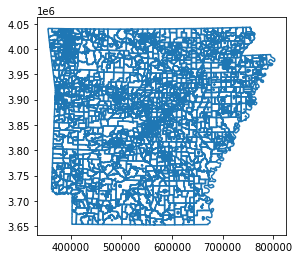

In [268]:
ar_shp.boundary.plot()

In [269]:
print(ar_shp.shape)
vest_shp.shape

(2747, 52)


(2591, 21)

<AxesSubplot:>

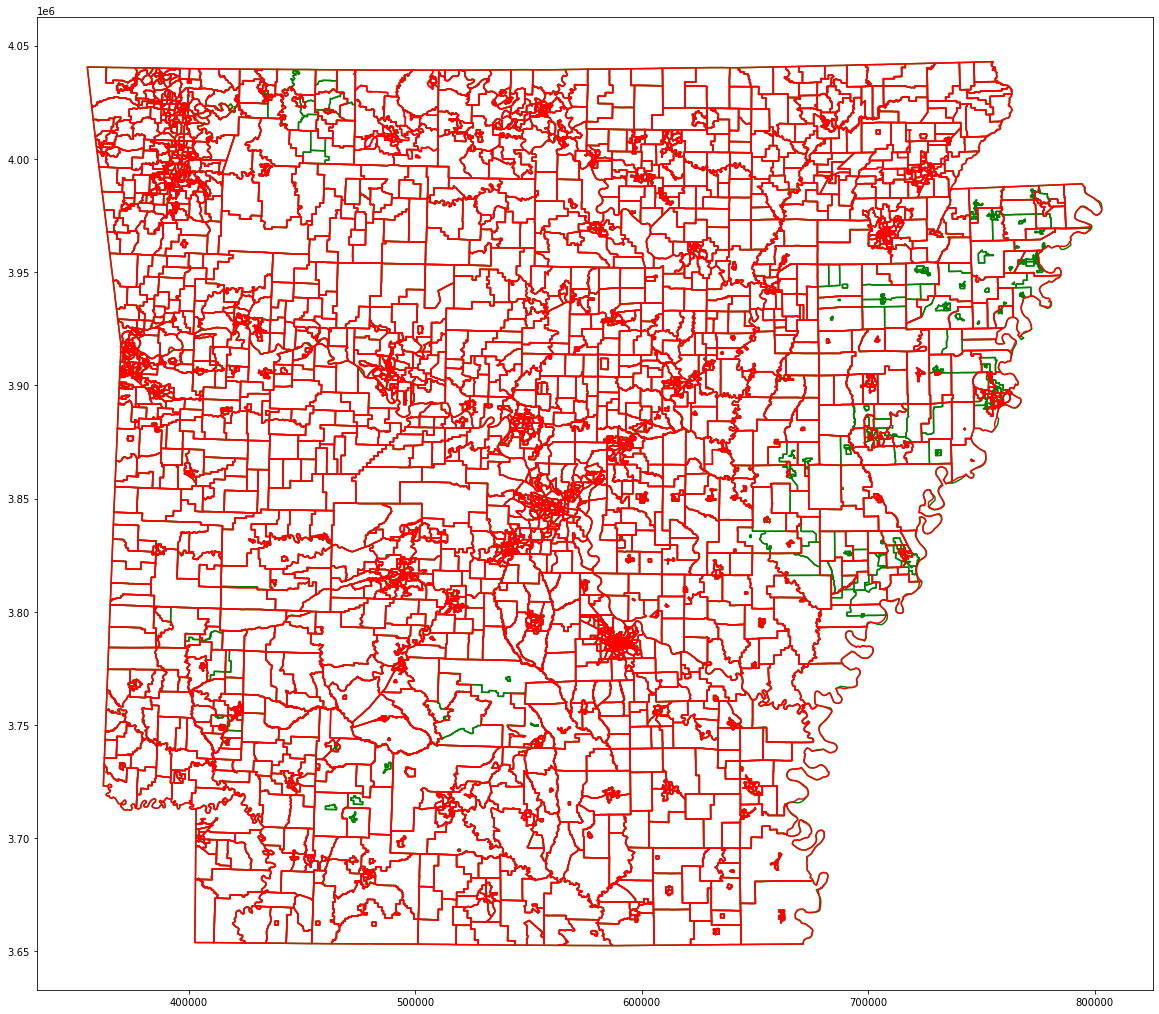

In [270]:
ax = ar_shp.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [271]:
ar_shp["join_col"]=ar_shp['countyfp20']+ar_shp['namelsad20']

In [272]:
#Uppercase both join columns
ar_shp['join_col'] = ar_shp['join_col'].str.upper()

#Strip white space
ar_shp['join_col']=ar_shp['join_col'].str.strip()

In [273]:
join_attempt_one = pd.merge(ar_shp,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2292
left_only      455
right_only     283
Name: _merge, dtype: int64


In [274]:
join_attempt_one['join_col'] = join_attempt_one['join_col'].astype('str')
join_attempt_one[join_attempt_one['_merge'] != 'both'][['countyfp20','namelsad20','COUNTY_FIP','PRECINCT','join_col']].to_csv('./test3.csv')

In [275]:
ar_names_dict2 = {'00310 - CROSS ROADS': '00310 - CROSSROADS',
 '0051-1': '00501-1',
 '0051-2': '00501-2',
 '0051-3': '00501-3',
 '0052-1': '00502-1',
 '0052-2': '00502-2',
 '0052-3': '00502-3',
 '0053-1': '00503-1',
 '0053-2': '00503-2',
 '0053-3': '00503-3',
 '0053-4': '00503-4',
 '0054-1': '00504-1',
 '0054-2': '00504-2',
 '0055-1': '00505-1',
 '0055-2': '00505-2',
 '0055-3': '00505-3',
 '0055-4': '00505-4',
 '0056-1': '00506-1',
 '0056-2': '00506-2',
 '0056-3': '00506-3',
 '0057-1': '00507-1',
 '0057-2': '00507-2',
 '0057-3': '00507-3',
 '0058-1': '00508-1',
 '0058-2': '00508-2',
 '0058-3': '00508-3',
 '0058-4': '00508-4',
 '0058-5': '00508-5',
 '0059-1': '00509-1',
 '0059-2': '00509-2',
 '0059-3': '00509-3',
 '0059-4': '00509-4',
 '017101 - CARLTON': '017101 - CARLTON 1',
 '02502B - KINGSLAND OUT': '02502B - KINGSLAND OUTSIDE',
 '029006-MENIFEE CITY': '029006 - MENIFEE CITY',
 '0311': '03101',
 '0312': '03102',
 '0313': '03103',
 '0314': '03104',
 '0315': '03105',
 '0316': '03106',
 '0317': '03107',
 '0318': '03108',
 '0319': '03109',
 '039801- DISTRICT 8': '039801 - DISTRICT 8',
 '083114 - SHT MTN WD 1': '083114 - SHORT MTN WD 1',
 '083115 - SHT MTN WD 2': '083115 - SHORT MTN WD 2',
 '083116 - SHT MTN WD 3': '083116 - SHORT MTN WD 3',
 '083117 - SHT MTN WD 4': '083117 - SHORT MTN WD 4',
 '09522 - HOLLY GROVE TOWNSHIP': '095HOLLY GROVE',
 '09527 - PINE RIDGE TOWNSHIP': '095PINE RIDGE',
 '107LAKE': '1072 - LAKE',
 '107MOONEY': '10717 - MOONEY',
 '107UPPER BIG CREEK': '10712 - UPPER BIG CREEK',
 '12107 - ELEVENPOINT': '12107 - ELEVEN POINT',
 '12113 - OKEAN': "12113 - O'KEAN",
 '139WOOLLEYS STORE': '139WOOLEYS STORE'}

In [276]:
#Use the dictionary to change the names
ar_shp["join_col"]=ar_shp["join_col"].map(ar_names_dict2).fillna(ar_shp["join_col"])

In [277]:
join_attempt_two = pd.merge(ar_shp,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          2349
left_only      398
right_only     226
Name: _merge, dtype: int64


In [278]:
ar_shp_merge = join_attempt_two[join_attempt_two['_merge'] == 'both']

In [279]:
final_merge = pd.merge(ar_shp_merge,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          2349
right_only     242
left_only        0
Name: final_merge, dtype: int64

In [280]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    2349
dtype: int64


1) For 05-000006 difference in area is 4.258726139703081
2) For 05-000012 difference in area is 2.851422120791703
3) For 05-000022 difference in area is 4.60991035638877
4) For 05-000001 difference in area is 5.371471397385415
5) For 05-000003 difference in area is 2.564066997299685
6) For 05-000010 difference in area is 2.86758794160283
7) For 05-000801 difference in area is 40.51009281538252
8) For 05-000601 difference in area is 115.42654024943776
9) For 05-000701 difference in area is 8.90538024357672
10) For 05-000016 difference in area is 0.6686072316606204
11) For 05-000008 difference in area is 2.0128506452199297
12) For 05-000011 difference in area is 0.5045306785817052
13) For 05-000004 difference in area is 2.177954310652842
14) For 05-000501 difference in area is 0.5204469300697949
15) For 05-000111 difference in area is 0.7898981650626106
16) For 05-009-1E difference in area is 0.6929325398146307
17) For 05-000015 difference in area is 0.5218430385329209
18) For 05-000007 

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\geopandas\plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 05-000022 difference in area is 0.5688665040556509
23) For 05-000011 difference in area is 1.759252778159425
24) For 05-000007 difference in area is 0.6252362777287931
25) For 05-001900 difference in area is 0.9702659358015004
26) For 05-000112 difference in area is 0.5489012176701041
27) For 05-000113 difference in area is 0.539282784222313
28) For 05-000205 difference in area is 0.6631248239421978
29) For 05-000013 difference in area is 1.2653159085432821
30) For 05-000051 difference in area is 0.5881203985867005
31) For 05-000045 difference in area is 0.8656067945588914
32) For 05-000045 difference in area is 5.071254962854215
33) For 05-000043 difference in area is 4.0315554616408456


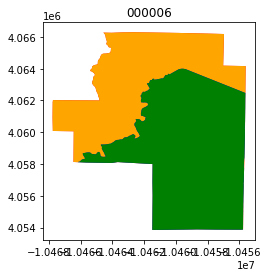

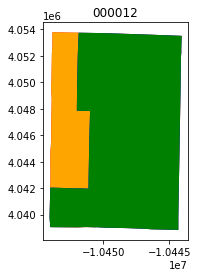

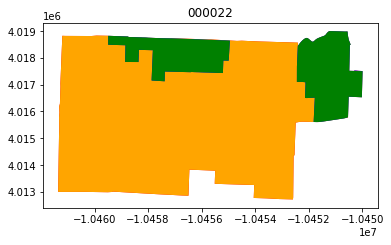

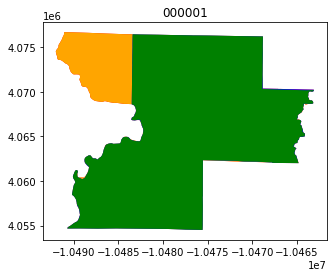

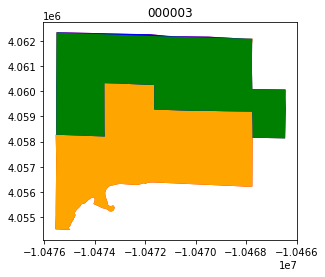

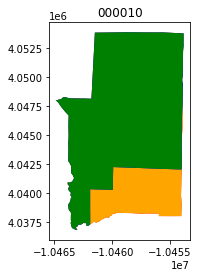

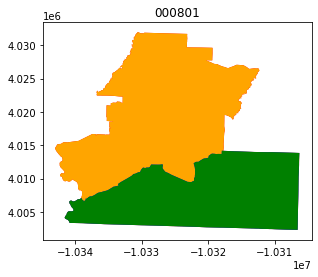

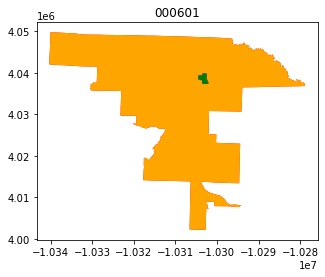

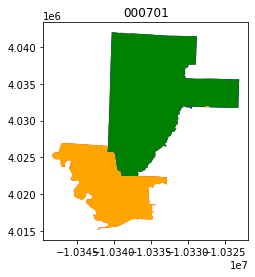

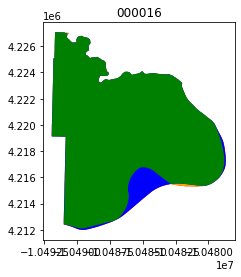

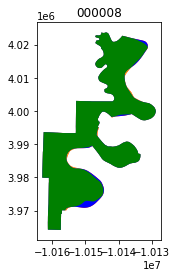

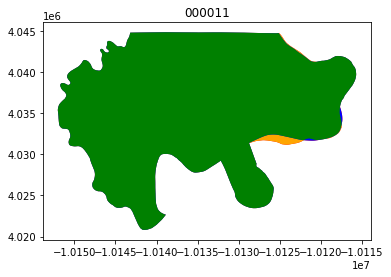

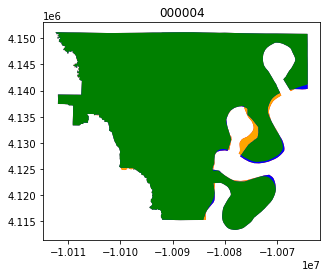

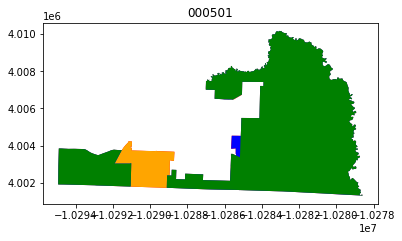

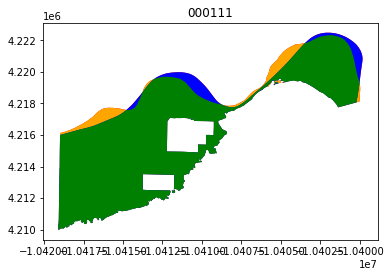

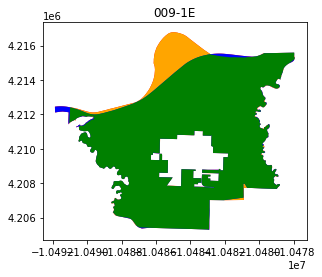

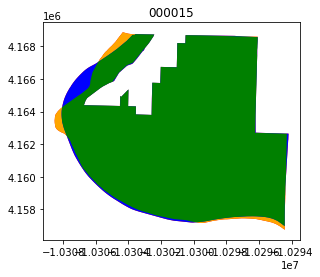

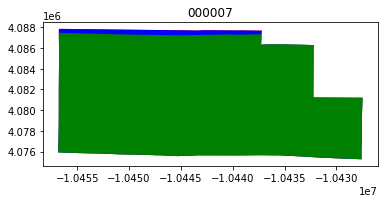

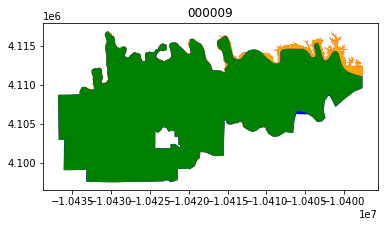

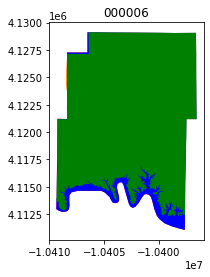

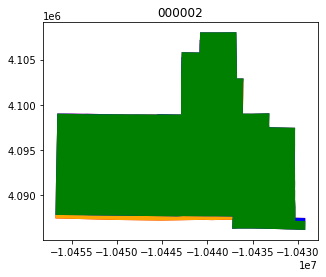

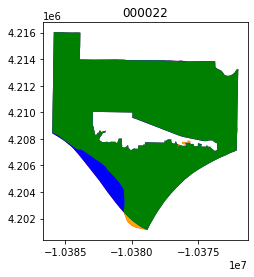

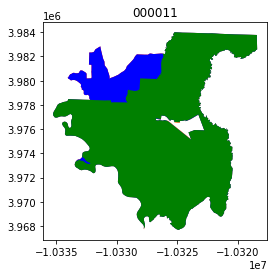

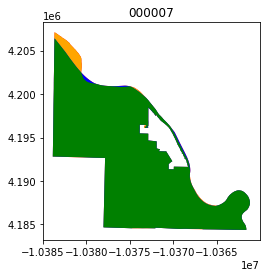

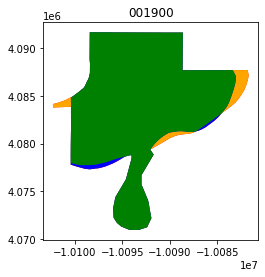

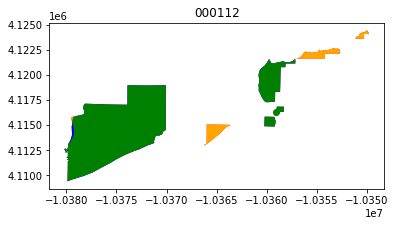

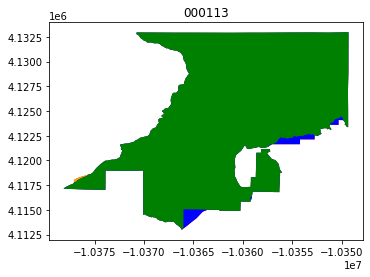

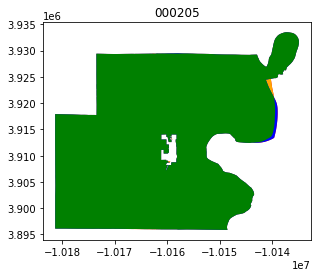

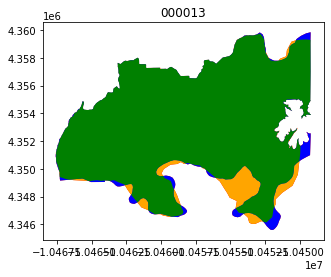

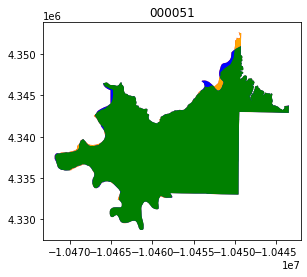

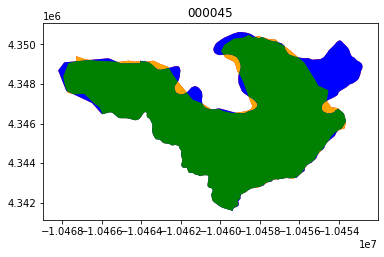

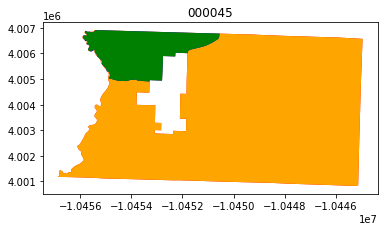

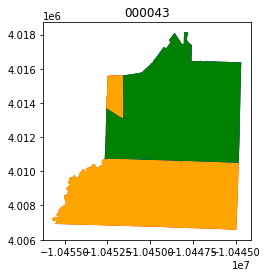

In [281]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [282]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2349, 1)
3 precincts w/ a difference of 0 km^2
2172 precincts w/ a difference between 0 and 0.1 km^2
141 precincts w/ a difference between 0.1 and 0.5 km^2
16 precincts w/ a difference between 0.5 and 1 km^2
4 precincts w/ a difference between 1 and 2 km^2
8 precincts w/ a difference between 2 and 5 km^2
5 precincts w/ a difference greater than 5 km^2
